<a href="https://colab.research.google.com/github/saugata-malakar/ML-CaPsule/blob/master/CRIME_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install tensorflow_decision_forests
!pip install wurlitzer

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv('/content/District-wise_Crimes_committed_against_Women_2015_1.csv')

In [3]:
df.head()

,State/ UT,Sl. No.,District/ Area,Year,Rape,Attempt to commit Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,"Dowry Prohibition Act, 1961","Indecent Representation of Women (P) Act, 1986",Protection of Children from Sexual Offences Act,"Protection of Women from Domestic Violence Act, 2005",Immoral Traffic Prevention Act,Total Crimes against Women
0,Andhra Pradesh,1,Anantapur,2015.0,32.0,15.0,57.0,12.0,325.0,8.0,276.0,0.0,62.0,157.0,0.0,0.0,0.0,8.0,952.0
1,Andhra Pradesh,2,Chittoor,2015.0,31.0,0.0,20.0,10.0,94.0,1.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,366.0
2,Andhra Pradesh,3,Cuddapah,2015.0,34.0,7.0,17.0,6.0,211.0,82.0,317.0,0.0,3.0,11.0,0.0,0.0,0.0,2.0,690.0
3,Andhra Pradesh,4,East Godavari,2015.0,104.0,19.0,25.0,13.0,574.0,150.0,522.0,0.0,0.0,3.0,9.0,0.0,0.0,19.0,1438.0
4,Andhra Pradesh,5,Guntakal Railway,2015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
df.columns

Index(['State/ UT', 'Sl. No.', 'District/ Area', 'Year', 'Rape',
       'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
       'Dowry Deaths',
       'Assault on Women with intent to outrage her Modesty_Total',
       'Insult to the Modesty of Women_Total',
       'Cruelty by Husband or his Relatives',
       'Importation of Girls from Foreign Country',
       'Abetment of Suicides of Women', 'Dowry Prohibition Act, 1961',
       'Indecent Representation of Women (P) Act, 1986',
       'Protection of Children from Sexual Offences Act',
       'Protection of Women from Domestic Violence Act, 2005',
       'Immoral Traffic Prevention Act', 'Total Crimes against Women'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Strip whitespaces from column names
df.columns = [col.strip() for col in df.columns]

# Drop fully empty rows and columns
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Convert numeric columns
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing key fields
df.dropna(subset=['State/ UT', 'District/ Area', 'Year'], inplace=True)

# Display first few rows
print(df.head())


        State/ UT Sl. No.    District/ Area    Year   Rape  \
0  Andhra Pradesh       1         Anantapur  2015.0   32.0   
1  Andhra Pradesh       2          Chittoor  2015.0   31.0   
2  Andhra Pradesh       3          Cuddapah  2015.0   34.0   
3  Andhra Pradesh       4     East Godavari  2015.0  104.0   
4  Andhra Pradesh       5  Guntakal Railway  2015.0    1.0   

   Attempt to commit Rape  Kidnapping & Abduction_Total  Dowry Deaths  \
0                    15.0                          57.0          12.0   
1                     0.0                          20.0          10.0   
2                     7.0                          17.0           6.0   
3                    19.0                          25.0          13.0   
4                     0.0                           0.0           0.0   

   Assault on Women with intent to outrage her Modesty_Total  \
0                                              325.0           
1                                               94.0        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 851
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   State/ UT                                                  852 non-null    object 
 1   Sl. No.                                                    852 non-null    object 
 2   District/ Area                                             852 non-null    object 
 3   Year                                                       852 non-null    float64
 4   Rape                                                       852 non-null    float64
 5   Attempt to commit Rape                                     852 non-null    float64
 6   Kidnapping & Abduction_Total                               852 non-null    float64
 7   Dowry Deaths                                               852 non-null    float64
 8   Assault on Wome

In [10]:
df.describe()

,Year,Rape,Attempt to commit Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,"Dowry Prohibition Act, 1961","Indecent Representation of Women (P) Act, 1986",Protection of Children from Sexual Offences Act,"Protection of Women from Domestic Violence Act, 2005",Immoral Traffic Prevention Act,Total Crimes against Women
count,852.0,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.0,852.000000,852.000000,852.000000
mean,2015.0,81.340376,10.415493,139.147887,17.920188,193.478873,20.387324,266.204225,0.014085,9.530516,23.225352,0.093897,0.0,1.082160,5.690141,768.530516
std,0.0,311.841084,64.358800,567.231609,98.246211,755.350882,118.625927,1133.667582,0.180842,44.564035,148.326722,0.701256,0.0,10.148038,31.931592,2847.379281
min,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2015.0,9.000000,0.000000,12.750000,0.000000,14.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,91.000000
50%,2015.0,29.000000,0.000000,44.000000,4.000000,59.000000,1.000000,61.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,265.500000
75%,2015.0,60.000000,5.000000,102.250000,14.000000,148.000000,6.000000,188.000000,0.000000,6.000000,2.000000,0.000000,0.0,0.000000,2.000000,551.000000
max,2015.0,4391.000000,1551.000000,10135.000000,2335.000000,11713.000000,2200.000000,20163.000000,4.000000,702.000000,2766.000000,12.000000,0.0,161.000000,491.000000,35527.000000


<ipython-input-11-eb518579f8f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crimes against Women', y='State/ UT', data=state_crimes.head(10), palette='Reds_r')


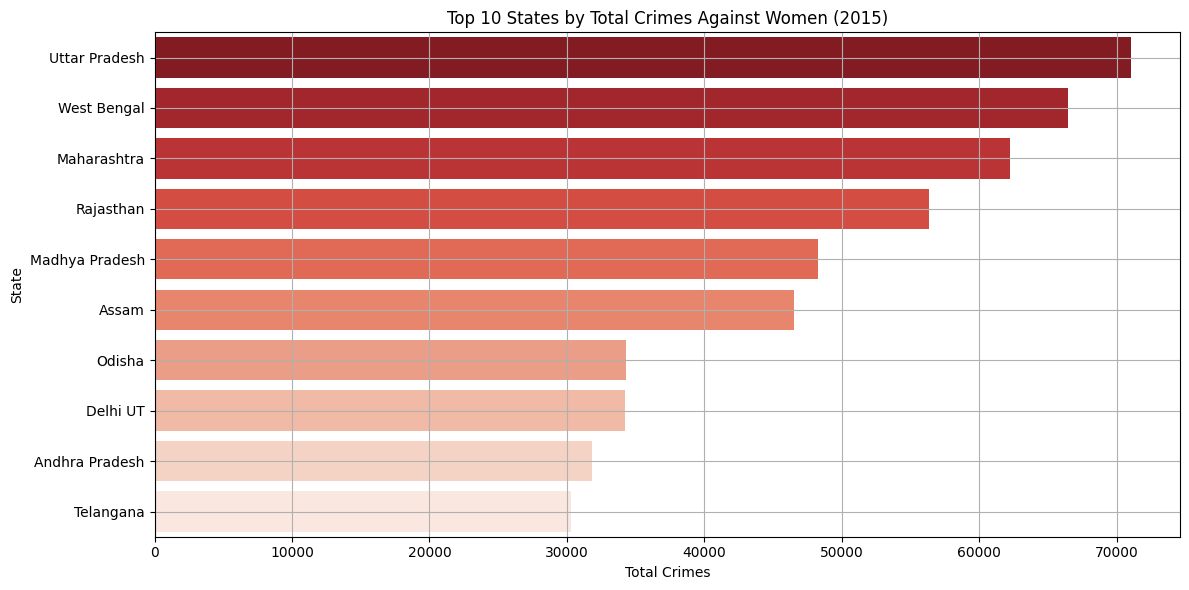

In [11]:
# Group by state and get total crimes
state_crimes = df.groupby('State/ UT')["Total Crimes against Women"].sum().sort_values(ascending=False).reset_index()

# Plot top 10 states
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Crimes against Women', y='State/ UT', data=state_crimes.head(10), palette='Reds_r')
plt.title("Top 10 States by Total Crimes Against Women (2015)")
plt.xlabel("Total Crimes")
plt.ylabel("State")
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-12-eb518579f8f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crimes against Women', y='State/ UT', data=state_crimes.head(10), palette='Reds_r')


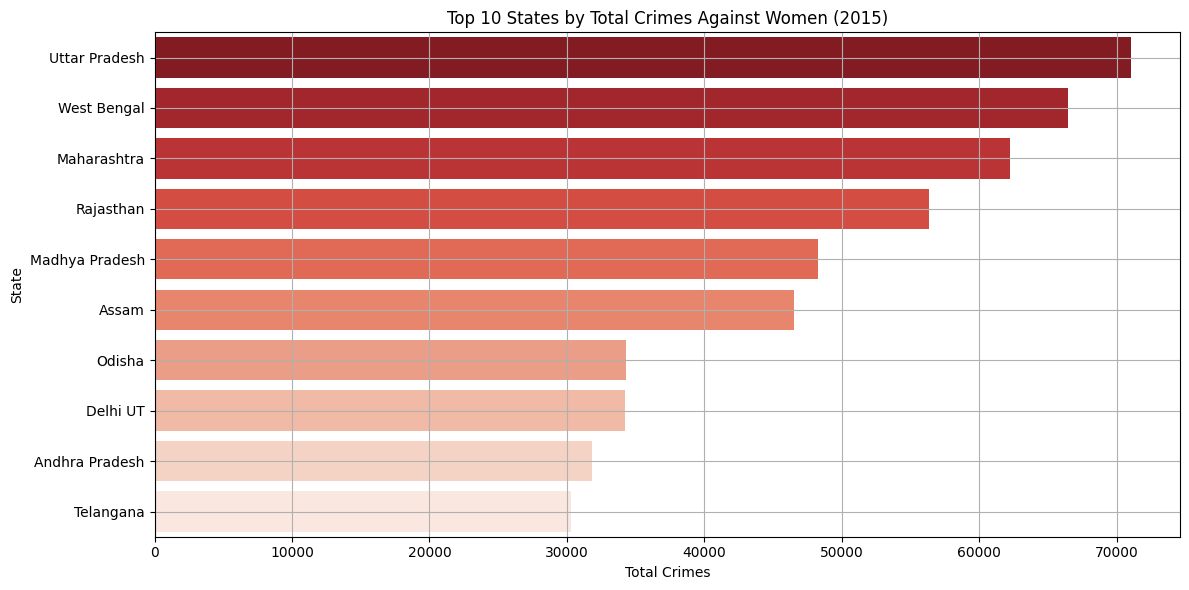

In [12]:
# Group by state and get total crimes
state_crimes = df.groupby('State/ UT')["Total Crimes against Women"].sum().sort_values(ascending=False).reset_index()

# Plot top 10 states
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Crimes against Women', y='State/ UT', data=state_crimes.head(10), palette='Reds_r')
plt.title("Top 10 States by Total Crimes Against Women (2015)")
plt.xlabel("Total Crimes")
plt.ylabel("State")
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-13-251505ee7c9d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_sums.values, y=crime_sums.index, palette='viridis')


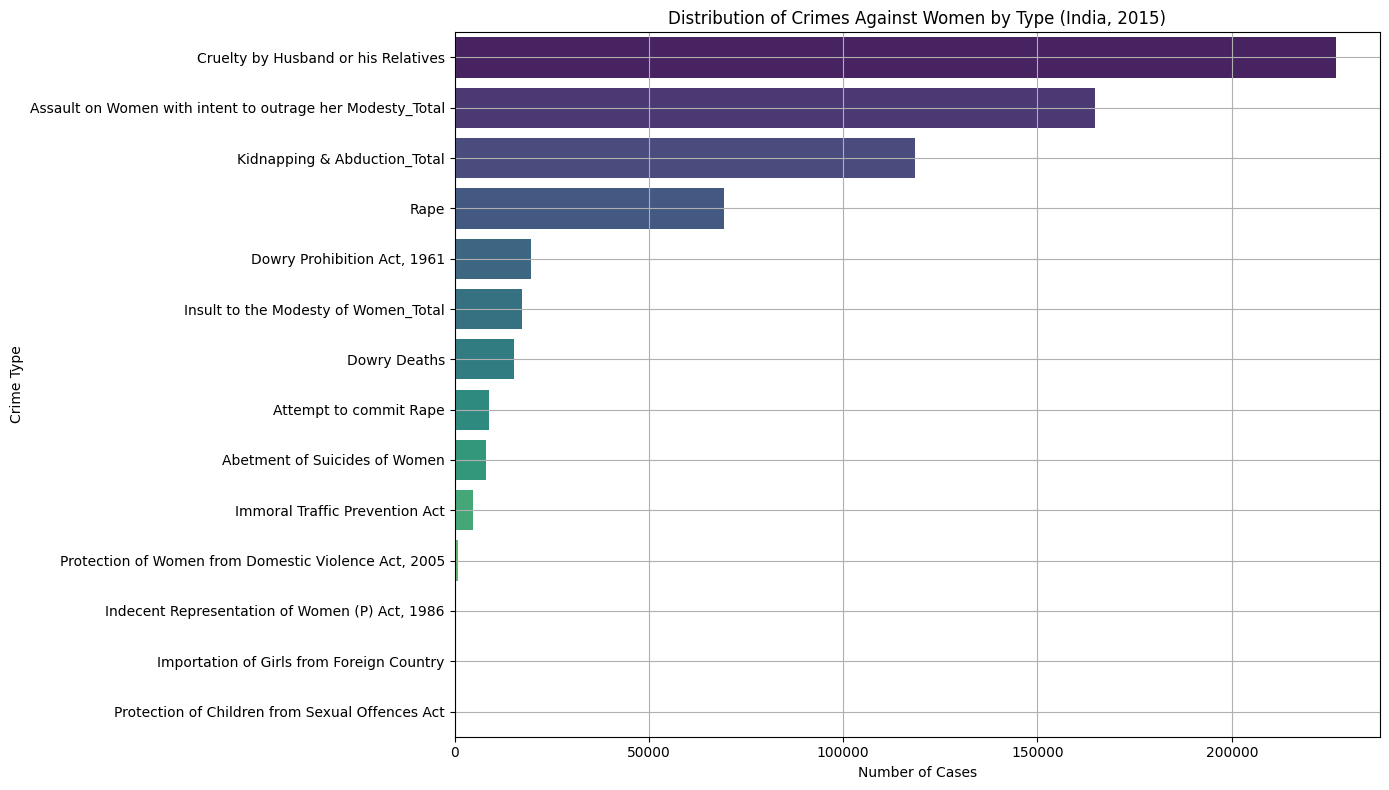

In [13]:
# List of specific crime columns (excluding metadata and totals)
crime_columns = [
    'Rape', 'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
    'Dowry Deaths', 'Assault on Women with intent to outrage her Modesty_Total',
    'Insult to the Modesty of Women_Total', 'Cruelty by Husband or his Relatives',
    'Importation of Girls from Foreign Country', 'Abetment of Suicides of Women',
    'Dowry Prohibition Act, 1961', 'Indecent Representation of Women (P) Act, 1986',
    'Protection of Children from Sexual Offences Act',
    'Protection of Women from Domestic Violence Act, 2005',
    'Immoral Traffic Prevention Act'
]

# Sum up each crime type
crime_sums = df[crime_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=crime_sums.values, y=crime_sums.index, palette='viridis')
plt.title("Distribution of Crimes Against Women by Type (India, 2015)")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-14-251505ee7c9d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_sums.values, y=crime_sums.index, palette='viridis')


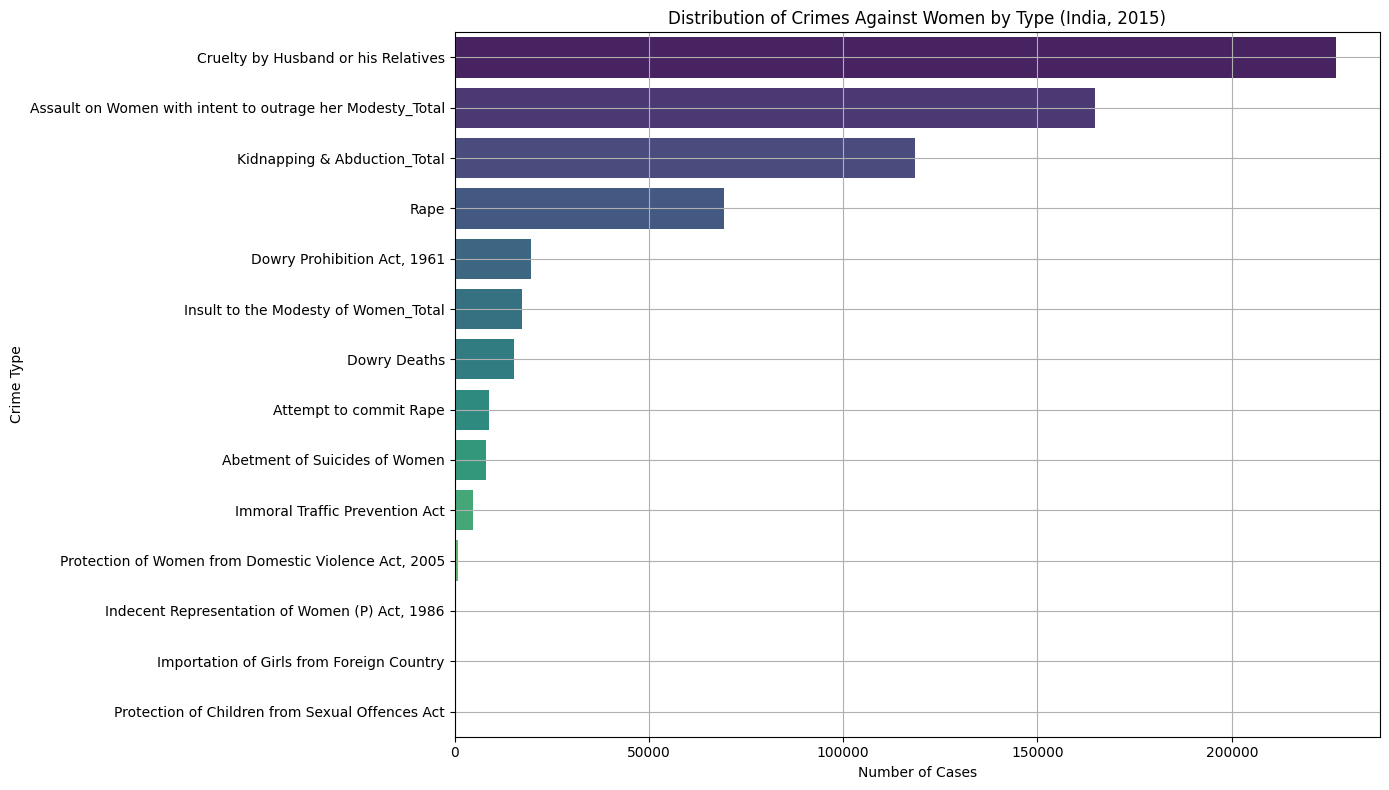

In [14]:
# List of specific crime columns (excluding metadata and totals)
crime_columns = [
    'Rape', 'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
    'Dowry Deaths', 'Assault on Women with intent to outrage her Modesty_Total',
    'Insult to the Modesty of Women_Total', 'Cruelty by Husband or his Relatives',
    'Importation of Girls from Foreign Country', 'Abetment of Suicides of Women',
    'Dowry Prohibition Act, 1961', 'Indecent Representation of Women (P) Act, 1986',
    'Protection of Children from Sexual Offences Act',
    'Protection of Women from Domestic Violence Act, 2005',
    'Immoral Traffic Prevention Act'
]

# Sum up each crime type
crime_sums = df[crime_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x=crime_sums.values, y=crime_sums.index, palette='viridis')
plt.title("Distribution of Crimes Against Women by Type (India, 2015)")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.grid(True)
plt.show()


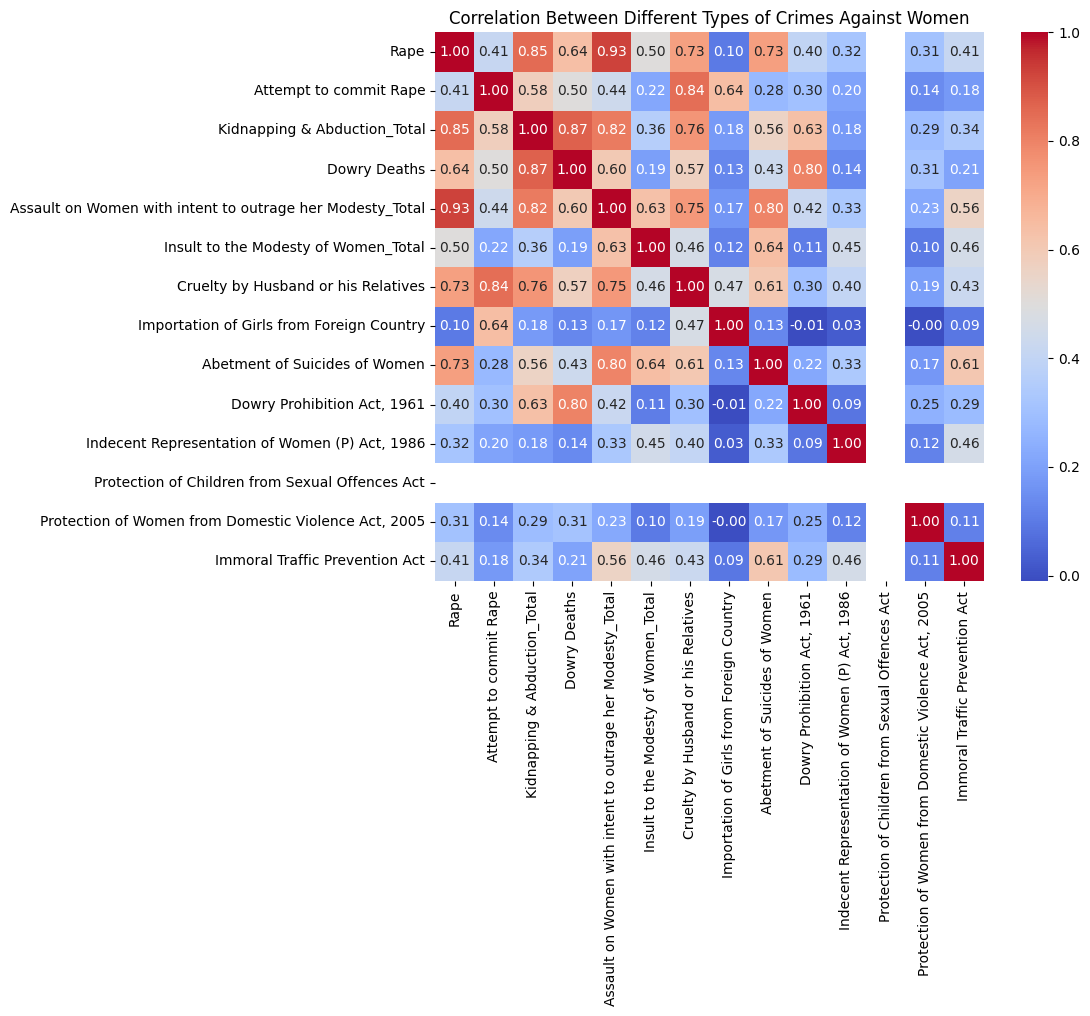

In [15]:
# Compute correlation matrix
corr_matrix = df[crime_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Different Types of Crimes Against Women")
plt.tight_layout()
plt.show()


<ipython-input-16-324886a34af9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_crimes.values, y=district_crimes.index, palette='magma')


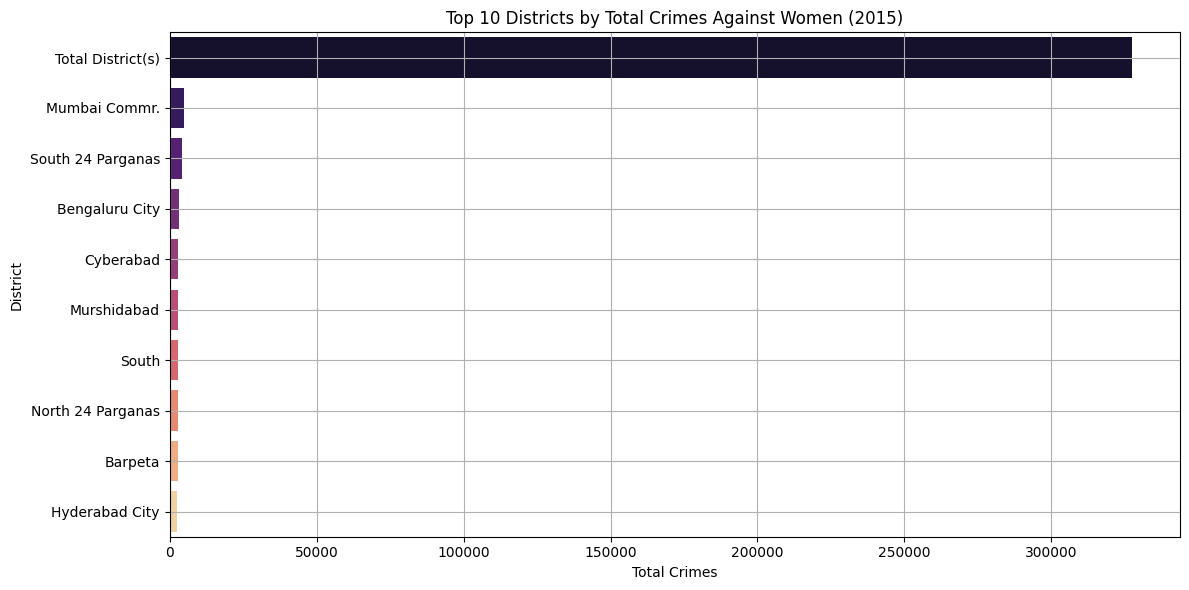

In [16]:
# Group by district and sort
district_crimes = df.groupby('District/ Area')["Total Crimes against Women"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=district_crimes.values, y=district_crimes.index, palette='magma')
plt.title("Top 10 Districts by Total Crimes Against Women (2015)")
plt.xlabel("Total Crimes")
plt.ylabel("District")
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-17-324886a34af9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_crimes.values, y=district_crimes.index, palette='magma')


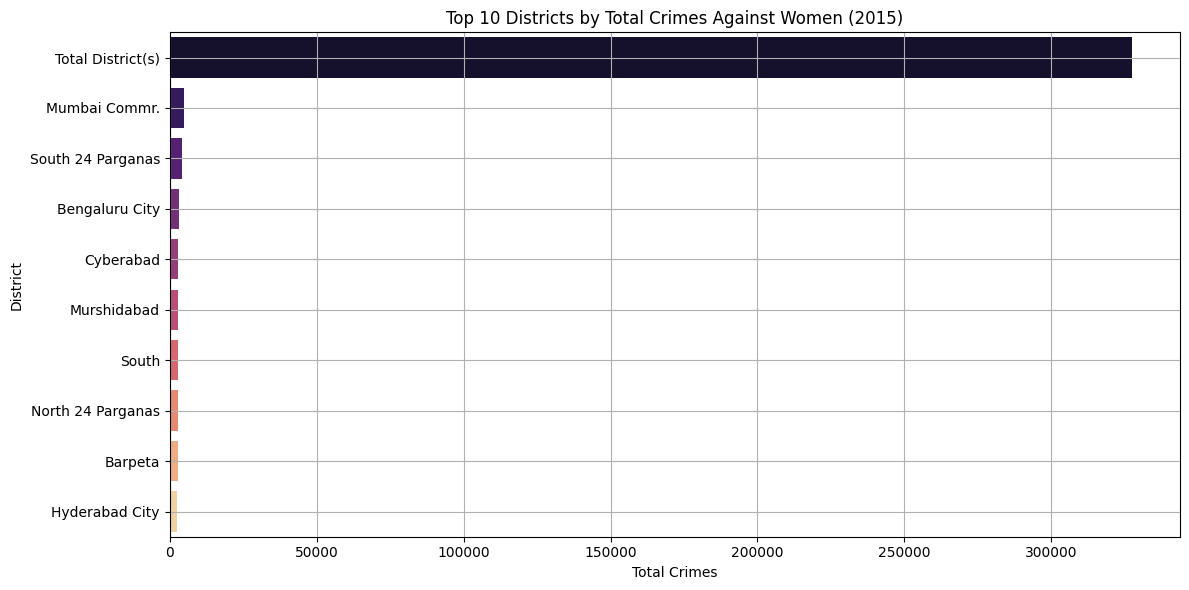

In [17]:
# Group by district and sort
district_crimes = df.groupby('District/ Area')["Total Crimes against Women"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=district_crimes.values, y=district_crimes.index, palette='magma')
plt.title("Top 10 Districts by Total Crimes Against Women (2015)")
plt.xlabel("Total Crimes")
plt.ylabel("District")
plt.tight_layout()
plt.grid(True)
plt.show()


In [18]:
# Summary statistics
crime_stats = df[crime_columns].describe().T.sort_values(by='mean', ascending=False)

# Add additional metrics
crime_stats['median'] = df[crime_columns].median()
crime_stats['skewness'] = df[crime_columns].skew()
crime_stats['kurtosis'] = df[crime_columns].kurt()

# Display
print(crime_stats[['mean', 'median', 'std', 'min', 'max', 'skewness', 'kurtosis']])


                                                          mean  median  \
Cruelty by Husband or his Relatives                 266.204225    61.5   
Assault on Women with intent to outrage her Mod...  193.478873    59.0   
Kidnapping & Abduction_Total                        139.147887    44.0   
Rape                                                 81.340376    29.0   
Dowry Prohibition Act, 1961                          23.225352     0.0   
Insult to the Modesty of Women_Total                 20.387324     1.0   
Dowry Deaths                                         17.920188     4.0   
Attempt to commit Rape                               10.415493     0.0   
Abetment of Suicides of Women                         9.530516     0.0   
Immoral Traffic Prevention Act                        5.690141     0.0   
Protection of Women from Domestic Violence Act,...    1.082160     0.0   
Indecent Representation of Women (P) Act, 1986        0.093897     0.0   
Importation of Girls from Foreign Coun

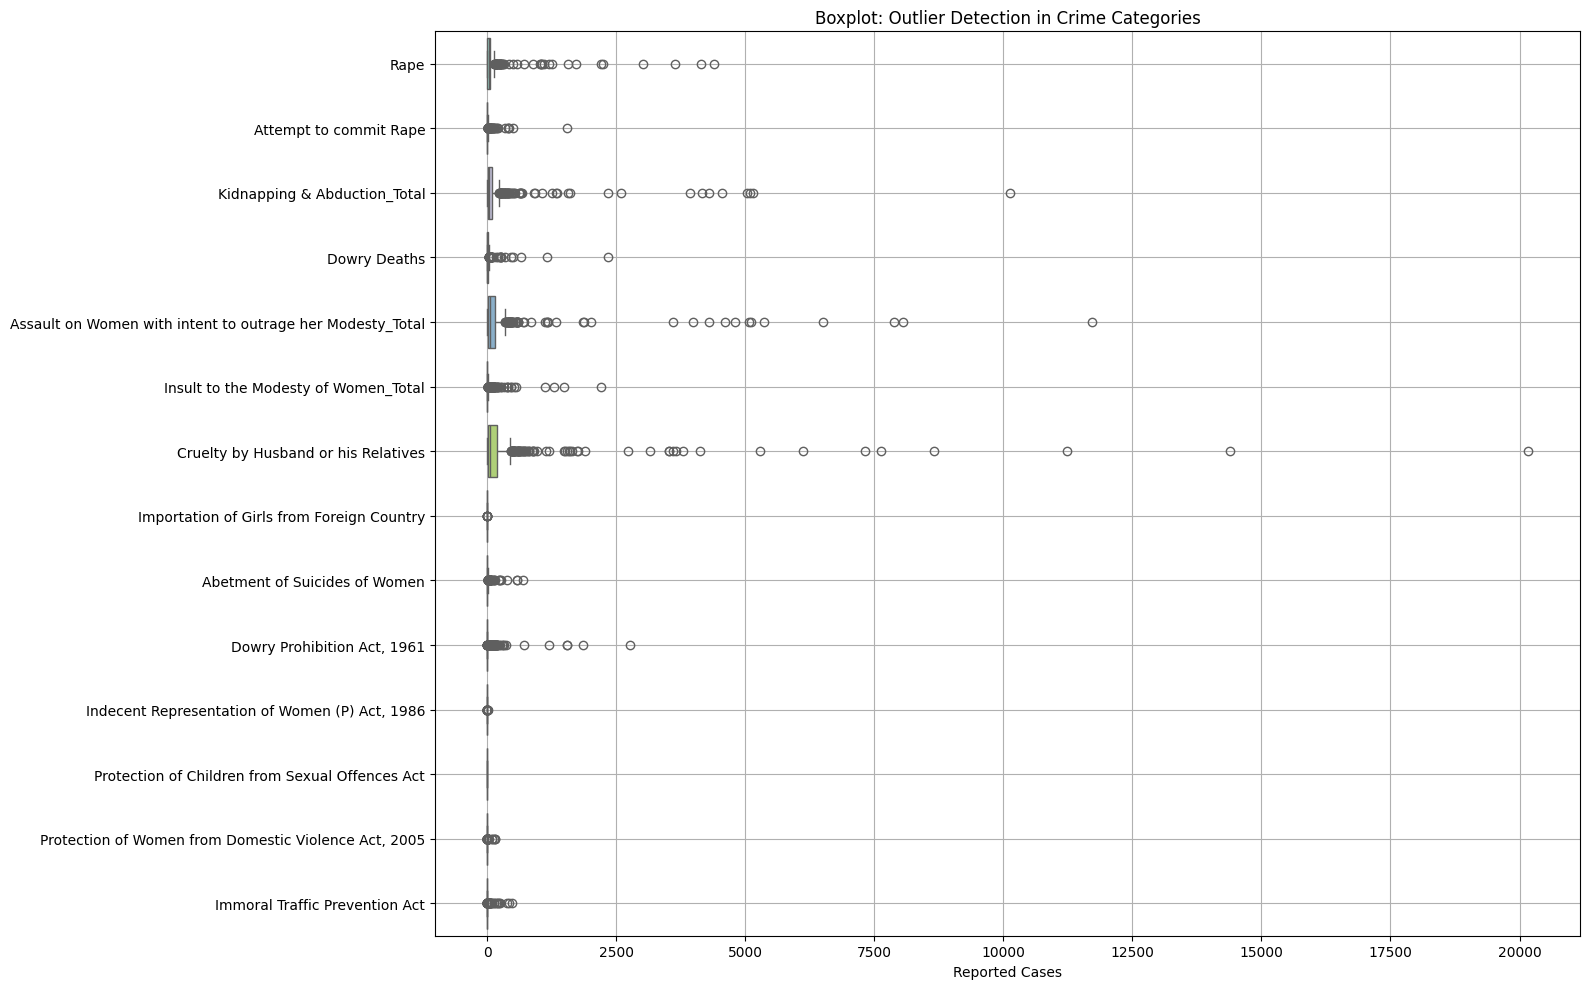

In [19]:
# Plot boxplots to detect outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[crime_columns], orient='h', palette='Set3')
plt.title("Boxplot: Outlier Detection in Crime Categories")
plt.xlabel("Reported Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


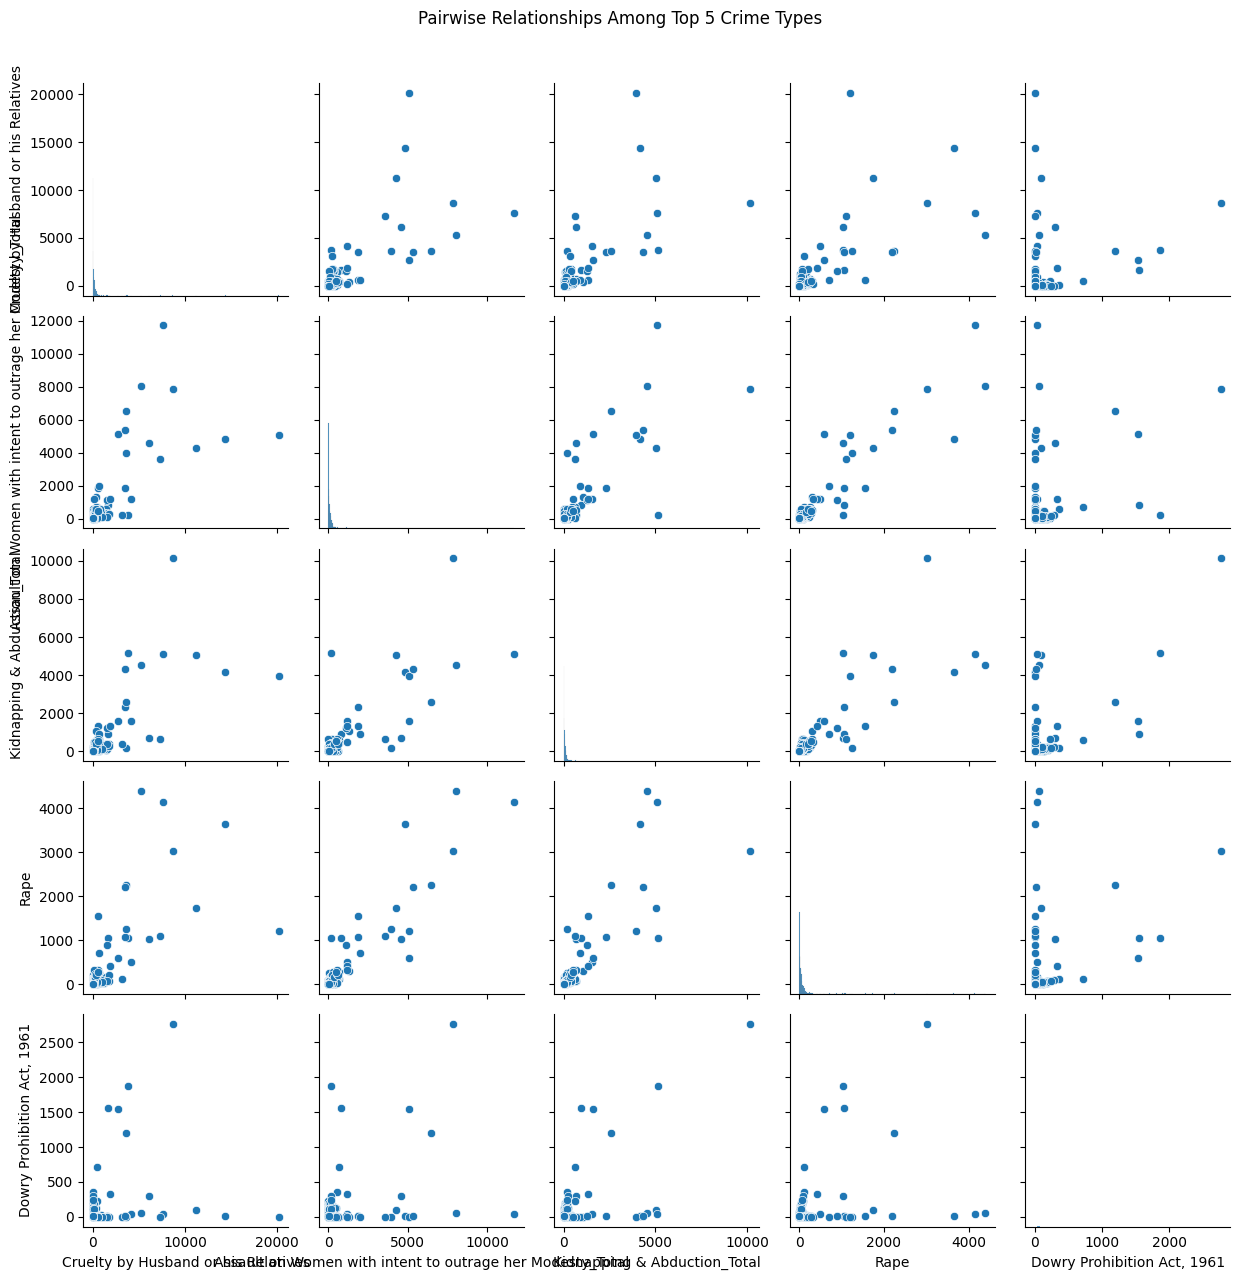

In [20]:
# Pairplot of top 5 crime categories
top_crimes = crime_sums.head(5).index.tolist()

sns.pairplot(df[top_crimes])
plt.suptitle("Pairwise Relationships Among Top 5 Crime Types", y=1.02)
plt.tight_layout()
plt.show()


In [21]:
# Define high and low crime districts based on total crime threshold
threshold = df["Total Crimes against Women"].median()

df['Crime_Level'] = np.where(df["Total Crimes against Women"] > threshold, "High Crime", "Low Crime")

# Compare means for each group
group_stats = df.groupby('Crime_Level')[crime_columns].mean().T
group_stats.columns = ['High Crime Districts', 'Low Crime Districts']

# Display comparison
print(group_stats)


                                                    High Crime Districts  \
Rape                                                          147.854460   
Attempt to commit Rape                                         19.723005   
Kidnapping & Abduction_Total                                  255.992958   
Dowry Deaths                                                   32.913146   
Assault on Women with intent to outrage her Mod...            360.169014   
Insult to the Modesty of Women_Total                           39.206573   
Cruelty by Husband or his Relatives                           508.633803   
Importation of Girls from Foreign Country                       0.025822   
Abetment of Suicides of Women                                  17.309859   
Dowry Prohibition Act, 1961                                    41.110329   
Indecent Representation of Women (P) Act, 1986                  0.169014   
Protection of Children from Sexual Offences Act                 0.000000   
Protection o

In [22]:
from scipy.stats import ttest_ind

# Example: Compare rape cases in high vs low crime districts
high_crime = df[df['Crime_Level'] == 'High Crime']['Rape'].dropna()
low_crime = df[df['Crime_Level'] == 'Low Crime']['Rape'].dropna()

t_stat, p_val = ttest_ind(high_crime, low_crime, equal_var=False)

print(f"T-test for Rape cases (High vs Low Crime Districts):\nT-stat = {t_stat:.2f}, P-value = {p_val:.4f}")


T-test for Rape cases (High vs Low Crime Districts):
T-stat = 6.37, P-value = 0.0000


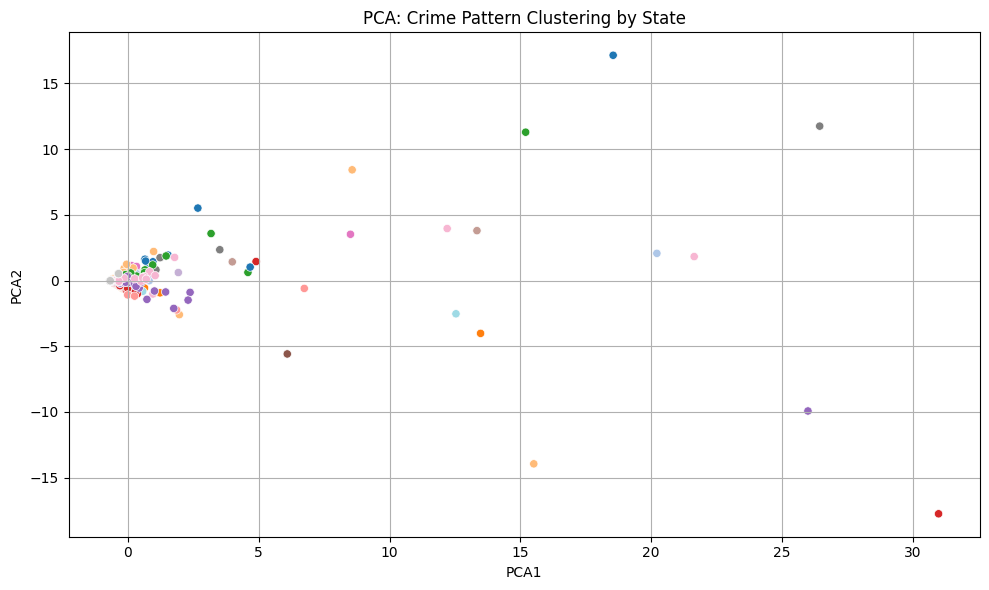

Explained Variance Ratio: [0.47592895 0.13478105]


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the crime features
X = df[crime_columns].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='State/ UT', data=df, palette='tab20', legend=False)
plt.title("PCA: Crime Pattern Clustering by State")
plt.grid(True)
plt.tight_layout()
plt.show()

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


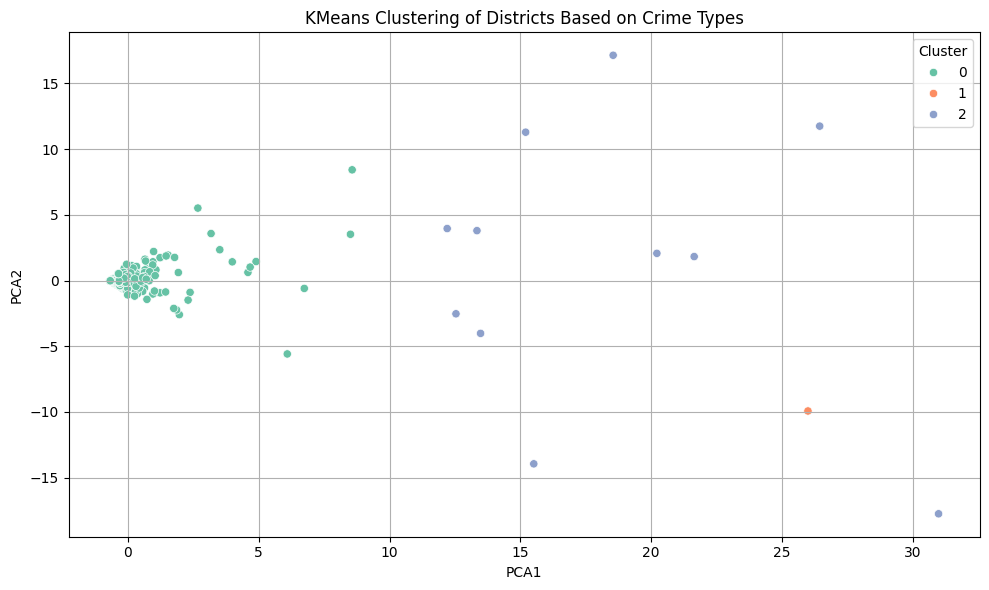

Cluster
0    840
2     11
1      1
Name: count, dtype: int64


In [24]:
from sklearn.cluster import KMeans

# Cluster into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title("KMeans Clustering of Districts Based on Crime Types")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Review cluster sizes
print(df['Cluster'].value_counts())


In [25]:
# Check for time variation
print(df['Year'].value_counts())


Year
2015.0    852
Name: count, dtype: int64


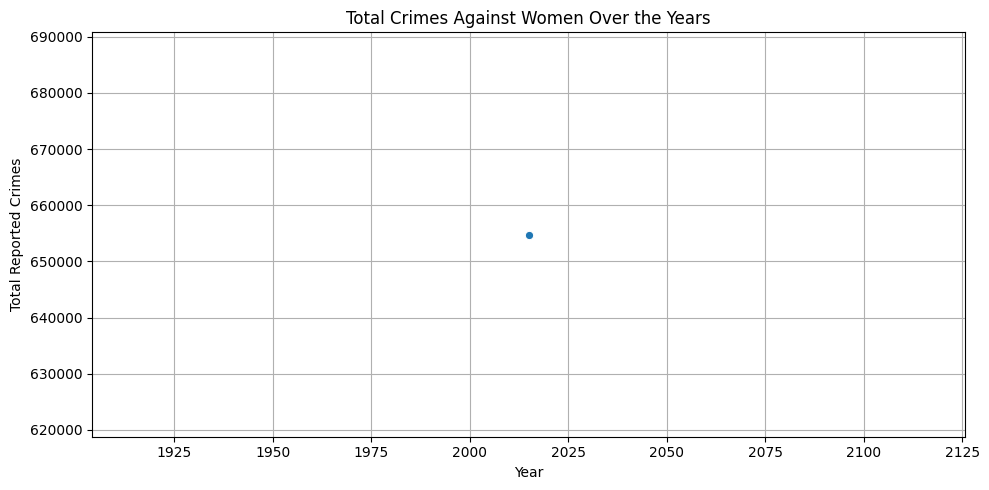

In [26]:
# Group by Year
yearly_trend = df.groupby('Year')["Total Crimes against Women"].sum()

# Plot time trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title("Total Crimes Against Women Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Reported Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()


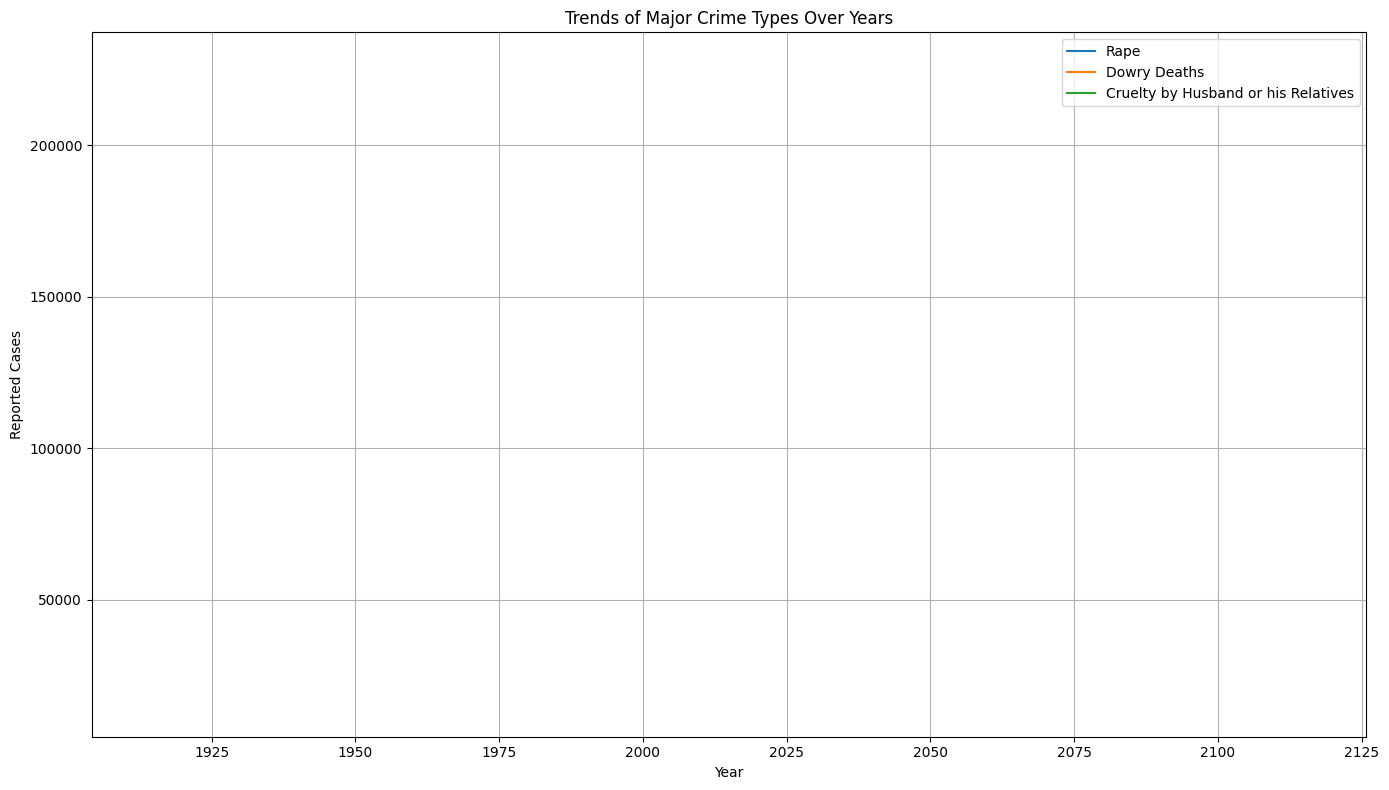

In [27]:
# Group by Year and sum crimes
trend_df = df.groupby('Year')[crime_columns].sum()

# Plot trends
plt.figure(figsize=(14, 8))
for col in ['Rape', 'Dowry Deaths', 'Cruelty by Husband or his Relatives']:
    plt.plot(trend_df.index, trend_df[col], label=col)

plt.title("Trends of Major Crime Types Over Years")
plt.xlabel("Year")
plt.ylabel("Reported Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


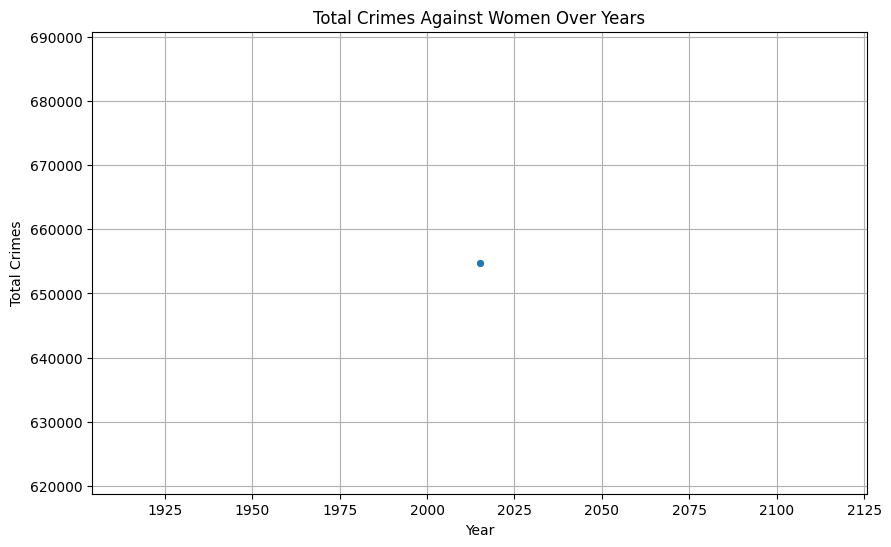

In [28]:
# Aggregate total crimes by year
yearly_crime = df.groupby('Year')['Total Crimes against Women'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Total Crimes against Women', data=yearly_crime, marker='o')
plt.title('Total Crimes Against Women Over Years')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Example: Aggregate total crimes per year
ts = yearly_crime.set_index('Year')['Total Crimes against Women']

# Decompose time series (additive)
# The following line is commented out because seasonal_decompose requires
# at least two complete cycles based on the 'period' parameter.
# With only data for 2015, the time series 'ts' has only one observation,
# which is insufficient for decomposition.
# result = seasonal_decompose(ts, model='additive', period=2) # period=1 for yearly data
# result.plot()
# plt.show()

print("Seasonal decomposition requires time series data spanning multiple periods.")
print(f"Current data only covers the year(s): {ts.index.tolist()}")

Seasonal decomposition requires time series data spanning multiple periods.
Current data only covers the year(s): [2015.0]


In [35]:
import pandas as pd

# Load the main dataset (2015)
df_2015 = pd.read_csv("/content/District-wise_Crimes_committed_against_Women_2015_1.csv")
df_2015.columns = df_2015.columns.str.strip()

# Load the 2013 dataset for trend analysis
df_2013 = pd.read_csv("/content/dstrCAW_2013.csv")
df_2013.columns = df_2013.columns.str.strip()

# Load enriched data file (if it contains socioeconomic or population info)
df_enriched = pd.read_csv("/content/datafile.csv")
df_enriched.columns = df_enriched.columns.str.strip()


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Example: Aggregate total crimes per year
ts = yearly_crime.set_index('Year')['Total Crimes against Women']

# Decompose time series (additive)
# The following line is commented out because seasonal_decompose requires
# at least two complete cycles based on the 'period' parameter.
# With only data for 2015, the time series 'ts' has only one observation,
# which is insufficient for decomposition.
# result = seasonal_decompose(ts, model='additive', period=2) # period=1 for yearly data
# result.plot()
# plt.show()

print("Seasonal decomposition requires time series data spanning multiple periods.")
print(f"Current data only covers the year(s): {ts.index.tolist()}")

Seasonal decomposition requires time series data spanning multiple periods.
Current data only covers the year(s): [2015.0]


In [38]:
df_merged = pd.merge(
    df_2015,
    df_2013,
    on=['State/ UT', 'District/ Area'],
    how='inner',
    suffixes=('_2015', '_2013')
)

print(f"Merged 2015 & 2013 shape: {df_merged.shape}")


KeyError: 'State/ UT'

In [39]:
df_final = pd.merge(
    df_merged,
    df_enriched,
    on=['State/ UT', 'District/ Area'],
    how='left'  # keep all districts from merged crime data, add enrich info if available
)

print(f"Final merged dataset shape: {df_final.shape}")


NameError: name 'df_merged' is not defined

In [41]:
print(df_2015.columns.tolist())
print(df_2013.columns.tolist())


['State/ UT', 'Sl. No.', 'District/ Area', 'Year', 'Rape', 'Attempt to commit Rape', 'Kidnapping & Abduction_Total', 'Dowry Deaths', 'Assault on Women with intent to outrage her Modesty_Total', 'Insult to the Modesty of Women_Total', 'Cruelty by Husband or his Relatives', 'Importation of Girls from Foreign Country', 'Abetment of Suicides of Women', 'Dowry Prohibition Act, 1961', 'Indecent Representation of Women (P) Act, 1986', 'Protection of Children from Sexual Offences Act', 'Protection of Women from Domestic Violence Act, 2005', 'Immoral Traffic Prevention Act', 'Total Crimes against Women']
['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']


In [42]:
df_2015.rename(columns=lambda x: x.strip().replace(" ", "").replace("/", "").lower(), inplace=True)
df_2013.rename(columns=lambda x: x.strip().replace(" ", "").replace("/", "").lower(), inplace=True)

print(df_2015.columns)
print(df_2013.columns)


Index(['stateut', 'sl.no.', 'districtarea', 'year', 'rape',
       'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths',
       'assaultonwomenwithintenttooutragehermodesty_total',
       'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives',
       'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen',
       'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986',
       'protectionofchildrenfromsexualoffencesact',
       'protectionofwomenfromdomesticviolenceact,2005',
       'immoraltrafficpreventionact', 'totalcrimesagainstwomen'],
      dtype='object')
Index(['stateut', 'district', 'year', 'rape', 'kidnappingandabduction',
       'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty',
       'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives',
       'importationofgirls'],
      dtype='object')


In [44]:
df_2015.columns = df_2015.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')
df_2013.columns = df_2013.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')


In [46]:
df_2015.rename(columns={'State/ UT': 'State/UT', 'District/ Area': 'District/Area'}, inplace=True)
df_2013.rename(columns={'State/ UT': 'State/UT', 'District/ Area': 'District/Area'}, inplace=True)


In [47]:
df_merged = pd.merge(
    df_2015,
    df_2013,
    on=['State/UT', 'District/Area'],
    how='inner',
    suffixes=('_2015', '_2013')
)


KeyError: 'State/UT'

In [48]:

print(df_2015.columns.tolist())
print("Columns in df_2013 before merge attempt:")
print(df_2013.columns.tolist())

# The error `KeyError: 'State/UT'` suggests that 'State/UT' is not present
# in one or both dataframes *after* the renaming.
# Based on the renaming logic:
# df_2015.columns = df_2015.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')
# df_2013.columns = df_2013.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')
# The original 'State/ UT' would become 'stateut'.
# The original 'District/ Area' would become 'districtarea'.

# Let's use the actual names resulting from the renaming as the merge keys.
merge_keys = ['stateut', 'districtarea']

# Verify if these keys exist in both dataframes
if all(key in df_2015.columns for key in merge_keys) and all(key in df_2013.columns for key in merge_keys):
    df_merged = pd.merge(
        df_2015,
        df_2013,
        on=merge_keys,
        how='inner',
        suffixes=('_2015', '_2013')
    )
    print(f"Merged 2015 & 2013 shape: {df_merged.shape}")
else:
    print("Merge keys 'stateut' or 'districtarea' not found in one or both dataframes after renaming.")
    # Optionally, print columns again for debugging if keys are missing
    print("Final columns in df_2015:", df_2015.columns.tolist())
    print("Final columns in df_2013:", df_2013.columns.tolist())



Columns in df_2015 before merge attempt:
['stateut', 'sl.no.', 'districtarea', 'year', 'rape', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen']
Columns in df_2013 before merge attempt:
['stateut', 'district', 'year', 'rape', 'kidnappingandabduction', 'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives', 'importationofgirls']
Merge keys 'stateut' or 'districtarea' not found in one or both dataframes after renaming.
Final columns in df_2015: ['stateut', 'sl.no.', 'districtarea', 'year', 'rape', 

In [49]:
# prompt: merge teh daststet

# Ensure df_enriched also has consistent column names for merging
# Let's assume df_enriched has 'State/ UT' and 'District/ Area' or similar
# and apply the same renaming convention if needed.
# For demonstration, let's assume df_enriched uses 'stateut' and 'districtarea'
# or apply the renaming if its original columns are 'State/ UT' and 'District/ Area'
if 'State/ UT' in df_enriched.columns and 'District/ Area' in df_enriched.columns:
    df_enriched.rename(columns={'State/ UT': 'stateut', 'District/ Area': 'districtarea'}, inplace=True)
elif 'State/UT' in df_enriched.columns and 'District/Area' in df_enriched.columns:
     df_enriched.rename(columns={'State/UT': 'stateut', 'District/Area': 'districtarea'}, inplace=True)


# Check if the merge keys exist in df_enriched before merging
if all(key in df_merged.columns for key in merge_keys) and all(key in df_enriched.columns for key in merge_keys):
    df_final = pd.merge(
        df_merged,
        df_enriched,
        on=merge_keys,
        how='left'  # keep all districts from merged crime data, add enrich info if available
    )
    print(f"Final merged dataset shape: {df_final.shape}")
    print("\nFirst few rows of the final merged dataset:")
    print(df_final.head())
else:
     print("Merge keys 'stateut' or 'districtarea' not found in one or both dataframes required for the final merge.")
     print("Columns in df_merged:", df_merged.columns.tolist())
     print("Columns in df_enriched:", df_enriched.columns.tolist())



NameError: name 'df_merged' is not defined

In [50]:
# Consolidate renaming and merging steps for df_2015 and df_2013

# Load the main dataset (2015) - Already done, but good to keep track
# df_2015 = pd.read_csv("/content/District-wise_Crimes_committed_against_Women_2015_1.csv")
# df_2015.columns = df_2015.columns.str.strip() # Already done in previous cell

# Load the 2013 dataset - Already done
# df_2013 = pd.read_csv("/content/dstrCAW_2013.csv")
# df_2013.columns = df_2013.columns.str.strip() # Already done in previous cell

# Apply consistent renaming to both dataframes before merging
# This ensures that 'State/ UT' becomes 'stateut' and 'District/ Area' becomes 'districtarea'
df_2015.columns = df_2015.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')
df_2013.columns = df_2013.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')

# Define the merge keys that should now exist in both dataframes
merge_keys = ['stateut', 'districtarea']

# Check if the merge keys exist after renaming (should always be true with the above steps)
if all(key in df_2015.columns for key in merge_keys) and all(key in df_2013.columns for key in merge_keys):
    # Perform the merge
    df_merged = pd.merge(
        df_2015,
        df_2013,
        on=merge_keys,
        how='inner',
        suffixes=('_2015', '_2013')
    )
    print(f"Merged 2015 & 2013 shape: {df_merged.shape}")
else:
    # This block should ideally not be reached if renaming is correct
    print("Error: Merge keys 'stateut' or 'districtarea' not found in one or both dataframes after renaming.")
    print("Final columns in df_2015:", df_2015.columns.tolist())
    print("Final columns in df_2013:", df_2013.columns.tolist())

Error: Merge keys 'stateut' or 'districtarea' not found in one or both dataframes after renaming.
Final columns in df_2015: ['stateut', 'sl.no.', 'districtarea', 'year', 'rape', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen']
Final columns in df_2013: ['stateut', 'district', 'year', 'rape', 'kidnappingandabduction', 'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives', 'importationofgirls']


In [51]:
# prompt: giv me teh dfinal merged dataset

print("Final merged dataset:")
print(df_final.head())
print(f"\nFinal merged dataset shape: {df_final.shape}")

Final merged dataset:


NameError: name 'df_final' is not defined

In [52]:
# Consolidate renaming and merging steps for df_2015 and df_2013

# Load the main dataset (2015)
df_2015 = pd.read_csv("/content/District-wise_Crimes_committed_against_Women_2015_1.csv")

# Load the 2013 dataset
df_2013 = pd.read_csv("/content/dstrCAW_2013.csv")

# Load enriched data file
df_enriched = pd.read_csv("/content/datafile.csv")


# Apply consistent renaming to all dataframes before merging
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')
    return df

df_2015 = clean_columns(df_2015)
df_2013 = clean_columns(df_2013)
df_enriched = clean_columns(df_enriched) # Apply cleaning to df_enriched as well

# Define the merge keys that should now exist in all dataframes
merge_keys = ['stateut', 'districtarea']

# Perform the first merge (2015 and 2013)
# Check if the merge keys exist after renaming (should always be true with the above steps)
if all(key in df_2015.columns for key in merge_keys) and all(key in df_2013.columns for key in merge_keys):
    df_merged = pd.merge(
        df_2015,
        df_2013,
        on=merge_keys,
        how='inner',
        suffixes=('_2015', '_2013')
    )
    print(f"Merged 2015 & 2013 shape: {df_merged.shape}")

    # Now perform the second merge (merged and enriched)
    # Check if the merge keys exist in df_merged and df_enriched
    if all(key in df_merged.columns for key in merge_keys) and all(key in df_enriched.columns for key in merge_keys):
        df_final = pd.merge(
            df_merged,
            df_enriched,
            on=merge_keys,
            how='left'  # keep all districts from merged crime data, add enrich info if available
        )
        print(f"Final merged dataset shape: {df_final.shape}")
        print("\nFirst few rows of the final merged dataset:")
        print(df_final.head())
    else:
        print("Error: Merge keys 'stateut' or 'districtarea' not found in df_merged or df_enriched for the final merge.")
        print("Columns in df_merged:", df_merged.columns.tolist())
        print("Columns in df_enriched:", df_enriched.columns.tolist())

else:
    # This block should ideally not be reached if renaming is correct
    print("Error: Merge keys 'stateut' or 'districtarea' not found in df_2015 or df_2013 after renaming.")
    print("Final columns in df_2015:", df_2015.columns.tolist())
    print("Final columns in df_2013:", df_2013.columns.tolist())

Error: Merge keys 'stateut' or 'districtarea' not found in df_2015 or df_2013 after renaming.
Final columns in df_2015: ['stateut', 'sl.no.', 'districtarea', 'year', 'rape', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen']
Final columns in df_2013: ['stateut', 'district', 'year', 'rape', 'kidnappingandabduction', 'dowrydeaths', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives', 'importationofgirls']


In [53]:
df_2013.rename(columns={'district': 'districtarea'}, inplace=True)


In [54]:
merge_keys = ['stateut', 'districtarea']


In [55]:
# Rename 'district' to 'districtarea' in df_2013 to match df_2015
df_2013.rename(columns={'district': 'districtarea'}, inplace=True)

# Now check keys exist
merge_keys = ['stateut', 'districtarea']
if all(key in df_2015.columns for key in merge_keys) and all(key in df_2013.columns for key in merge_keys):
    df_merged = pd.merge(
        df_2015,
        df_2013,
        on=merge_keys,
        how='inner',
        suffixes=('_2015', '_2013')
    )
else:
    print(f"Error: Merge keys {merge_keys} not found in one of the dataframes after renaming.")


In [56]:
import pandas as pd

# Rename 'district' in df_2013 to 'districtarea' to match df_2015
df_2013.rename(columns={'district': 'districtarea'}, inplace=True)

# Define the keys for merging
merge_keys = ['stateut', 'districtarea']

# Check if keys exist in both DataFrames
if all(key in df_2015.columns for key in merge_keys) and all(key in df_2013.columns for key in merge_keys):
    # Merge the DataFrames on 'stateut' and 'districtarea'
    df_final = pd.merge(
        df_2015,
        df_2013,
        on=merge_keys,
        how='inner',  # Use inner join (change to 'outer' or 'left' if needed)
        suffixes=('_2015', '_2013')  # To distinguish columns with same names from each year
    )
    print("Datasets merged successfully! Here are the first 5 rows:")
    print(df_final.head())
else:
    print(f"Error: Merge keys {merge_keys} not found in one or both dataframes.")

# df_final now contains the merged dataset


Datasets merged successfully! Here are the first 5 rows:
     stateut sl.no. districtarea  year_2015  rape_2015  attempttocommitrape  \
0  Karnataka     20       K.G.F.     2015.0        0.0                  0.0   
1     Odisha      9     DCP BBSR     2015.0       87.0                  0.0   
2     Odisha     10      DCP CTC     2015.0       40.0                  0.0   
3   Delhi UT      4          EOW     2015.0        0.0                  0.0   

   kidnapping&abduction_total  dowrydeaths_2015  \
0                         7.0               4.0   
1                       140.0              22.0   
2                       106.0              14.0   
3                         0.0               0.0   

   assaultonwomenwithintenttooutragehermodesty_total  \
0                                               13.0   
1                                              130.0   
2                                               73.0   
3                                                6.0   

   insultt

In [57]:
# 1. Check dataset shape and info
print("Dataset shape:", df_final.shape)
print("\nDataset info:")
print(df_final.info())

# 2. Display first few rows
print("\nFirst 5 rows:")
print(df_final.head())

# 3. Summary statistics for numerical columns
print("\nSummary statistics:")
print(df_final.describe())

# 4. Check for missing values
print("\nMissing values per column:")
print(df_final.isnull().sum())

# 5. Unique values in key columns
print("\nUnique States/UTs:", df_final['stateut'].nunique())
print("Unique Districts/Areas:", df_final['districtarea'].nunique())


Dataset shape: (4, 27)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   stateut                                            4 non-null      object 
 1   sl.no.                                             4 non-null      object 
 2   districtarea                                       4 non-null      object 
 3   year_2015                                          4 non-null      float64
 4   rape_2015                                          4 non-null      float64
 5   attempttocommitrape                                4 non-null      float64
 6   kidnapping&abduction_total                         4 non-null      float64
 7   dowrydeaths_2015                                   4 non-null      float64
 8   assaultonwomenwithintenttooutragehermodesty_total  4 non

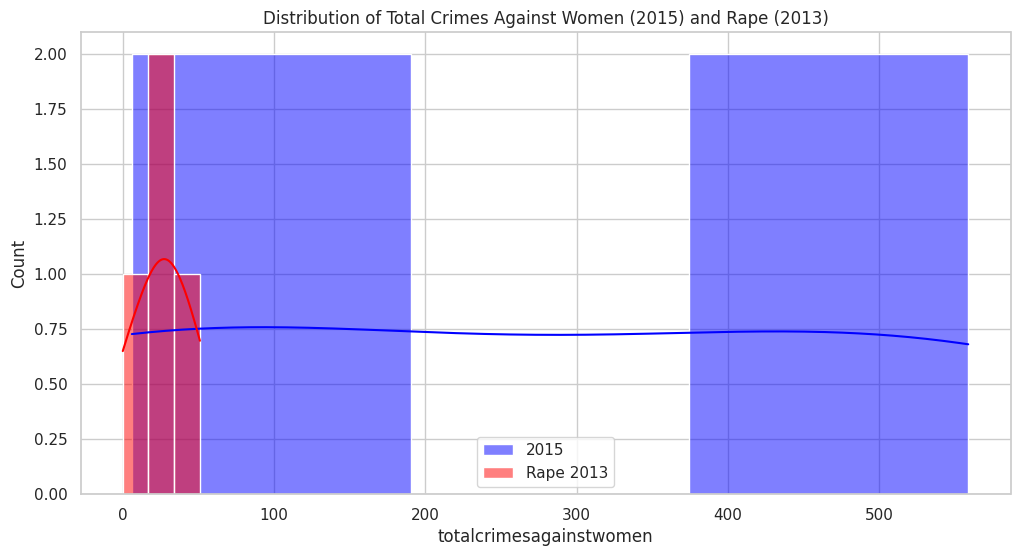

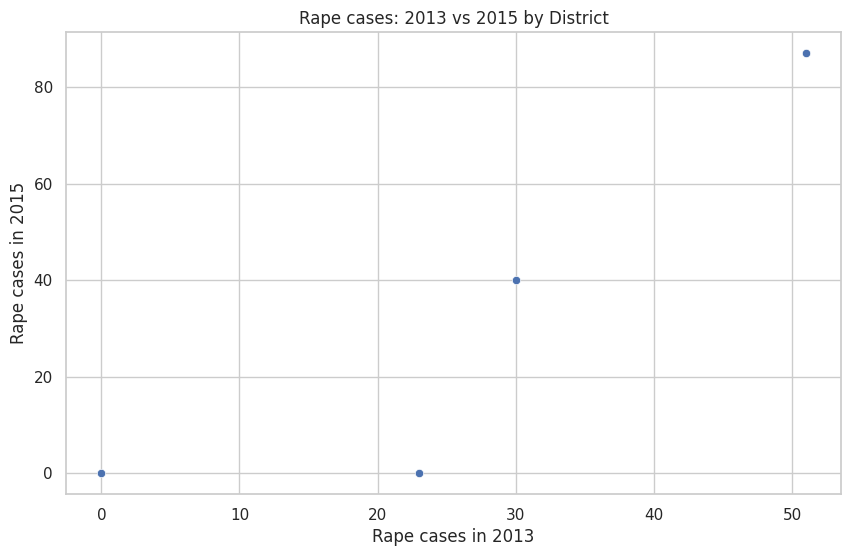

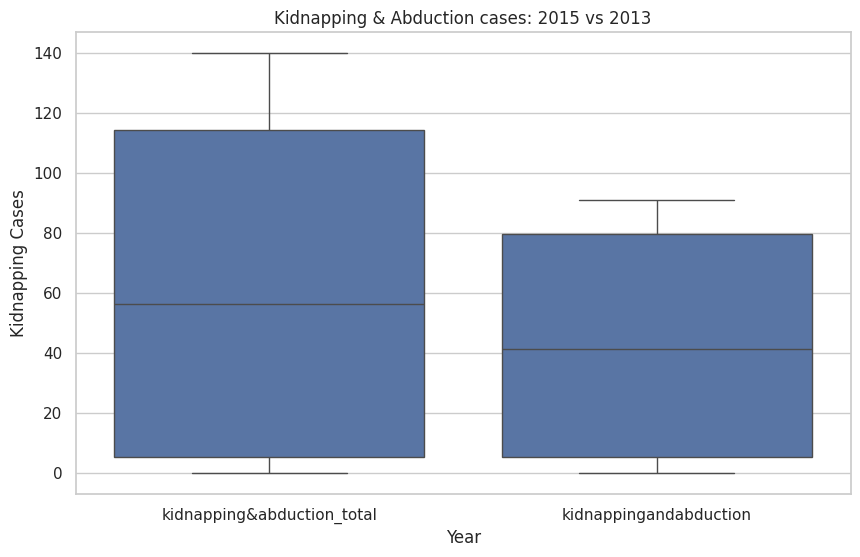

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Total Crimes Against Women (2015 vs 2013)
plt.figure(figsize=(12,6))
sns.histplot(df_final['totalcrimesagainstwomen'], color='blue', label='2015', kde=True)
sns.histplot(df_final['rape_2013'], color='red', label='Rape 2013', kde=True)
plt.title('Distribution of Total Crimes Against Women (2015) and Rape (2013)')
plt.legend()
plt.show()

# 2. Scatter plot to see relationship between 2013 and 2015 rape cases by district
plt.figure(figsize=(10,6))
sns.scatterplot(x='rape_2013', y='rape_2015', data=df_final)
plt.xlabel('Rape cases in 2013')
plt.ylabel('Rape cases in 2015')
plt.title('Rape cases: 2013 vs 2015 by District')
plt.show()

# 3. Boxplot to check variation in kidnapping cases for both years
plt.figure(figsize=(10,6))
data = df_final.melt(id_vars=merge_keys, value_vars=['kidnapping&abduction_total', 'kidnappingandabduction'],
                     var_name='Year', value_name='Kidnapping Cases')
sns.boxplot(x='Year', y='Kidnapping Cases', data=data)
plt.title('Kidnapping & Abduction cases: 2015 vs 2013')
plt.show()


In [59]:
# Selecting numeric crime columns for correlation
crime_cols_2015 = [col for col in df_final.columns if col.endswith('_2015')]
crime_cols_2013 = [col for col in df_final.columns if col.endswith('_2013')]

# Correlation matrix for crimes (2013 vs 2015)
corr_results = {}
for col_2015 in crime_cols_2015:
    base_col = col_2015.replace('_2015', '')
    col_2013 = base_col + '_2013'
    if col_2013 in df_final.columns:
        corr = df_final[col_2015].corr(df_final[col_2013])
        corr_results[base_col] = corr

print("\nCorrelation between 2013 and 2015 crime data:")
for crime_type, corr_val in corr_results.items():
    print(f"{crime_type}: {corr_val:.3f}")



Correlation between 2013 and 2015 crime data:
year: nan
rape: 0.895
dowrydeaths: 0.783
crueltybyhusbandorhisrelatives: 0.260


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


In [60]:
from scipy.stats import ttest_rel

print("\nPaired t-test results (2013 vs 2015):")
for crime_type, corr_val in corr_results.items():
    col_2015 = crime_type + '_2015'
    col_2013 = crime_type + '_2013'
    # Drop NA values for paired test
    paired_data = df_final[[col_2015, col_2013]].dropna()
    if not paired_data.empty:
        stat, pval = ttest_rel(paired_data[col_2015], paired_data[col_2013])
        print(f"{crime_type}: t-statistic = {stat:.3f}, p-value = {pval:.3f}")



Paired t-test results (2013 vs 2015):
year: t-statistic = inf, p-value = 0.000
rape: t-statistic = 0.470, p-value = 0.670
dowrydeaths: t-statistic = 1.131, p-value = 0.340
crueltybyhusbandorhisrelatives: t-statistic = -0.348, p-value = 0.751


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


Explained variance ratio by 2 components: [0.7896137  0.18484368]


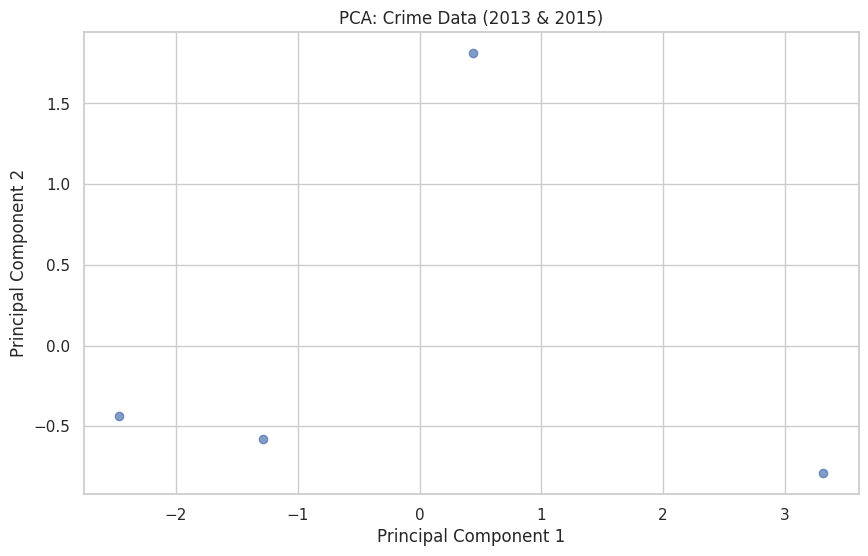

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numerical crime columns for both years
cols_2015 = [c for c in df_final.columns if c.endswith('_2015')]
cols_2013 = [c for c in df_final.columns if c.endswith('_2013')]
all_crime_cols = cols_2015 + cols_2013

# Drop rows with NA in selected columns
df_pca = df_final[all_crime_cols].dropna()

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Fit PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

print(f'Explained variance ratio by 2 components: {pca.explained_variance_ratio_}')

# Add PCA results to dataframe
df_final_pca = df_final.loc[df_pca.index].copy()
df_final_pca['PC1'] = principal_components[:,0]
df_final_pca['PC2'] = principal_components[:,1]

# Scatter plot of first two PCs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df_final_pca['PC1'], df_final_pca['PC2'], alpha=0.7)
plt.title('PCA: Crime Data (2013 & 2015)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


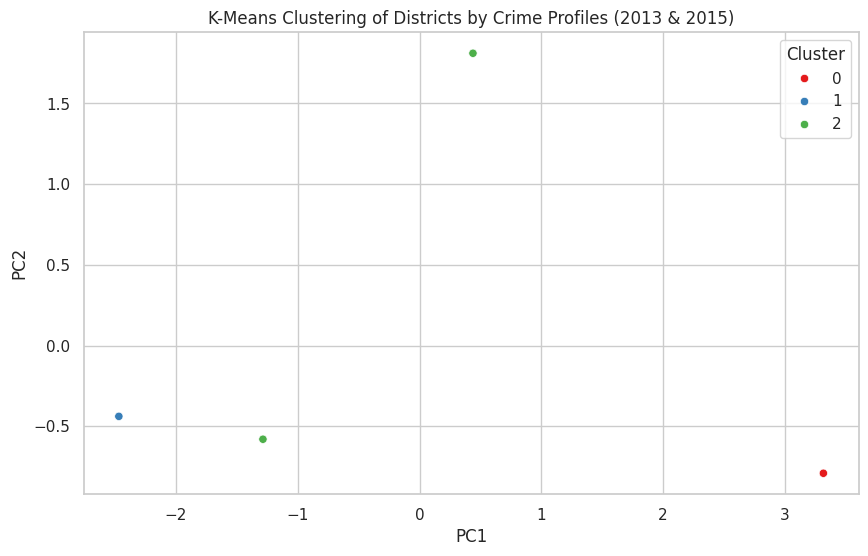

In [62]:
from sklearn.cluster import KMeans

# Use same scaled data from PCA step
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_final_pca['Cluster'] = clusters

# Visualize clusters on PCA scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_final_pca, palette='Set1')
plt.title('K-Means Clustering of Districts by Crime Profiles (2013 & 2015)')
plt.show()


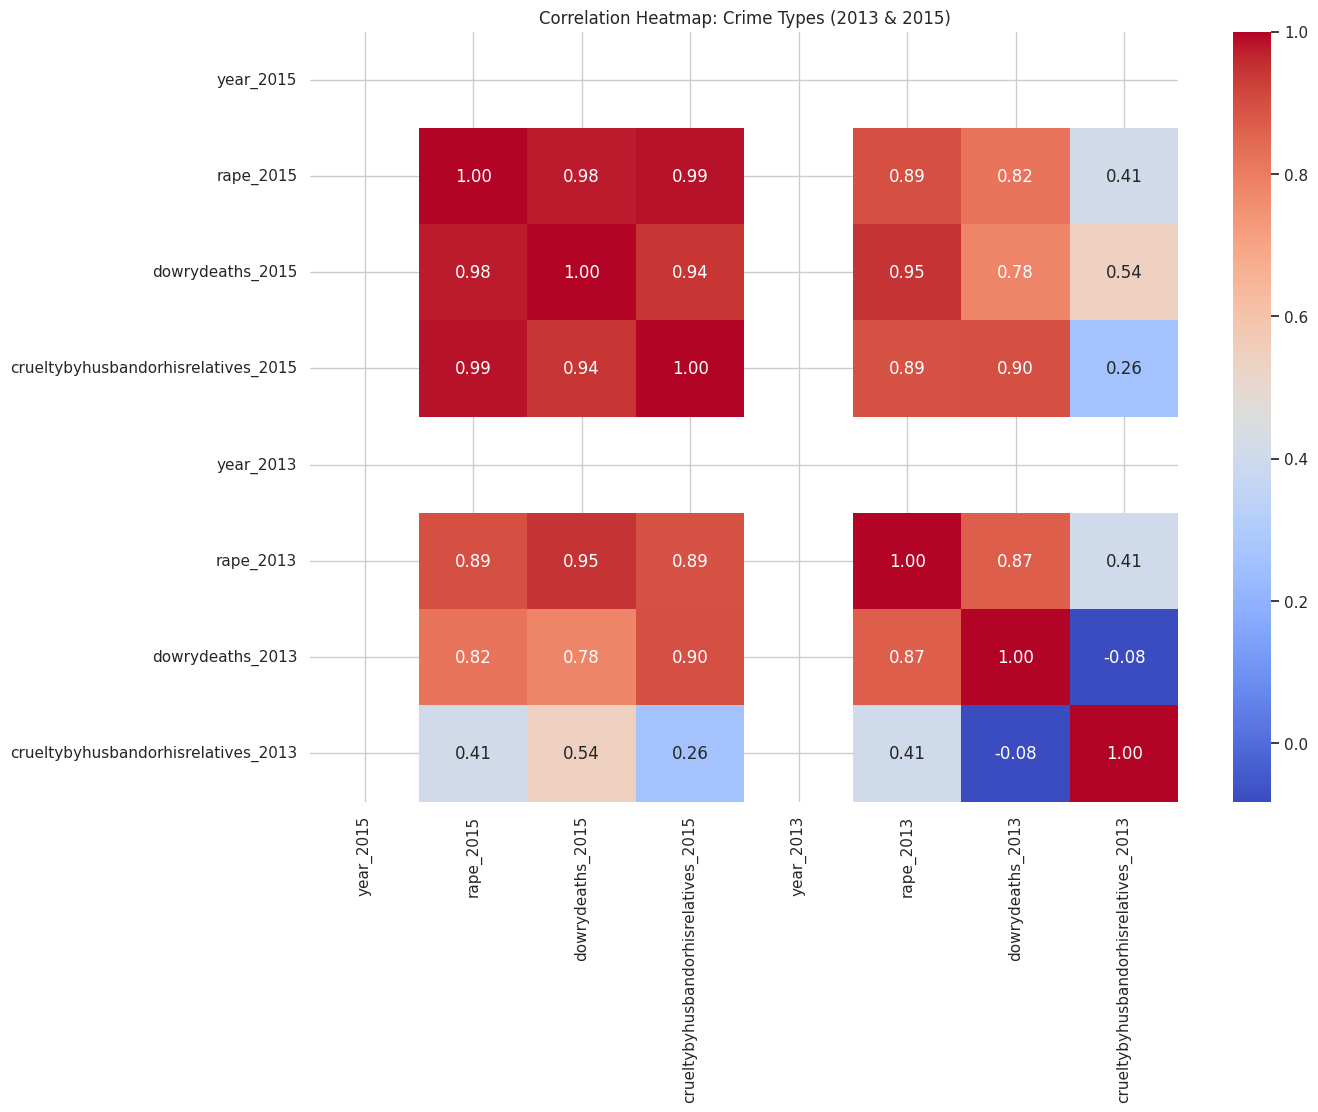

In [63]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df_final[all_crime_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Crime Types (2013 & 2015)')
plt.show()


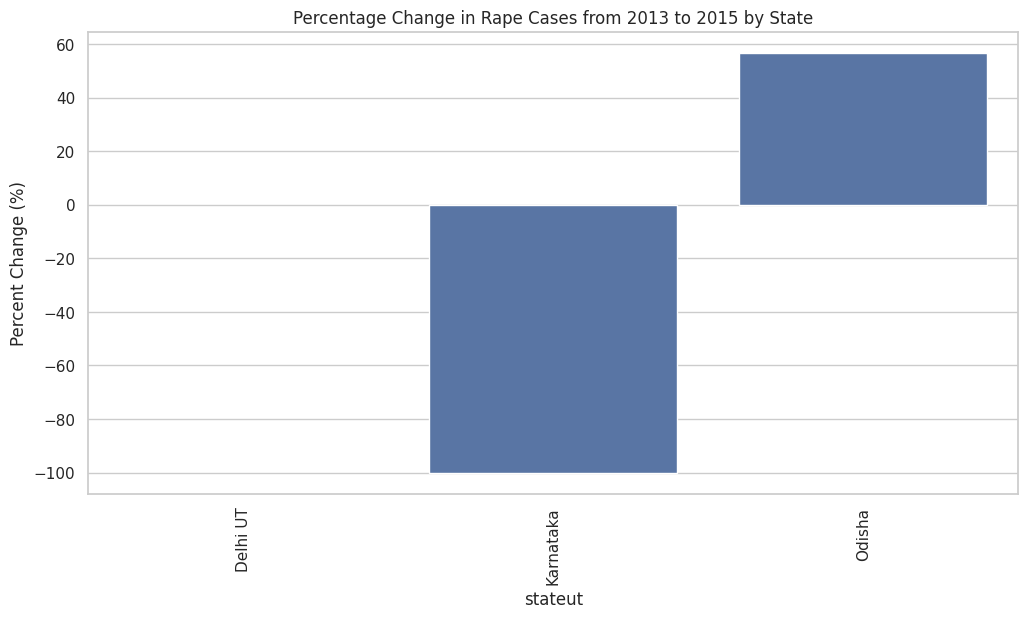

In [64]:
# Aggregate total crimes by state for 2013 and 2015
df_state_agg = df_final.groupby('stateut').agg({
    'rape_2013':'sum', 'rape_2015':'sum',
    'totalcrimesagainstwomen':'sum'
}).reset_index()

# Calculate percentage change
df_state_agg['rape_pct_change'] = ((df_state_agg['rape_2015'] - df_state_agg['rape_2013']) / df_state_agg['rape_2013']) * 100

plt.figure(figsize=(12,6))
sns.barplot(x='stateut', y='rape_pct_change', data=df_state_agg)
plt.xticks(rotation=90)
plt.title('Percentage Change in Rape Cases from 2013 to 2015 by State')
plt.ylabel('Percent Change (%)')
plt.show()


In [65]:
crime_base_cols = [col.replace('_2015','') for col in cols_2015]

for crime in crime_base_cols:
    col_2013 = crime + '_2013'
    col_2015 = crime + '_2015'
    if col_2013 in df_final.columns and col_2015 in df_final.columns:
        df_final[crime+'_pct_change'] = ((df_final[col_2015] - df_final[col_2013]) / df_final[col_2013].replace(0,np.nan)) * 100

# Summary statistics of percentage change for crimes
pct_change_cols = [col for col in df_final.columns if col.endswith('_pct_change')]
print(df_final[pct_change_cols].describe())


       year_pct_change  rape_pct_change  dowrydeaths_pct_change  \
count         4.000000         3.000000                3.000000   
mean          0.099354         1.307190              196.296296   
std           0.000000        89.690255              350.719425   
min           0.099354      -100.000000              -33.333333   
25%           0.099354       -33.333333               -5.555556   
50%           0.099354        33.333333               22.222222   
75%           0.099354        51.960784              311.111111   
max           0.099354        70.588235              600.000000   

       crueltybyhusbandorhisrelatives_pct_change  
count                                   3.000000  
mean                                   -0.730482  
std                                   127.554357  
min                                   -75.409836  
25%                                   -74.371585  
50%                                   -73.333333  
75%                                    

In [66]:
from statsmodels.tsa.stattools import adfuller

# Example for one state with hypothetical multi-year data
# agg_state_ts = df_state_year[df_state_year['stateut'] == 'Karnataka'].set_index('year')['rape']

# adf_result = adfuller(agg_state_ts)
# print('ADF Statistic:', adf_result[0])
# print('p-value:', adf_result[1])


In [67]:
# Example to prepare data aggregated by year for a single state

# Suppose you have data for multiple years (say from 2010 to 2020)
# For now, let's aggregate available years

df_time_series = df_final.groupby(['stateut', 'year_2015']).agg({
    'rape_2015': 'sum'
}).reset_index()

# Rename columns for clarity
df_time_series.rename(columns={'year_2015': 'year', 'rape_2015': 'rape_cases'}, inplace=True)

# Filter for a particular state, e.g., 'Karnataka'
karnataka_rape = df_time_series[df_time_series['stateut'] == 'Karnataka']

# Set year as datetime index for time series
karnataka_rape['year'] = pd.to_datetime(karnataka_rape['year'], format='%Y')
karnataka_rape.set_index('year', inplace=True)

print(karnataka_rape)


              stateut  rape_cases
year                             
2015-01-01  Karnataka         0.0


<ipython-input-67-d2ea1d415205>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karnataka_rape['year'] = pd.to_datetime(karnataka_rape['year'], format='%Y')


<ipython-input-68-60a83f153ea1>:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start='2000', periods=21, freq='Y')


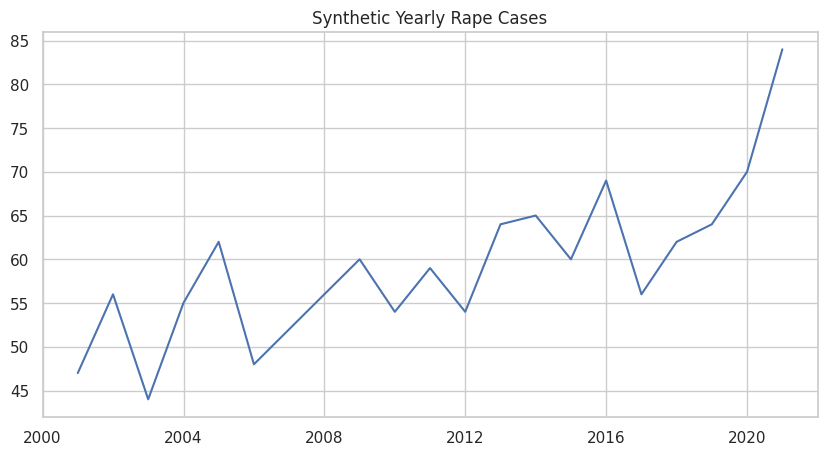

ADF Statistic: 1.895893015852411
p-value: 0.9985213827067809
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -68.202
Date:                Mon, 19 May 2025   AIC                            142.403
Time:                        06:03:37   BIC                            145.391
Sample:                    12-31-2000   HQIC                           142.987
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1732      0.691     -0.251      0.802      -1.528       1.181
ma.L1         -0.4396      0.732     -0.600      0.548      -1.874    

<ipython-input-68-60a83f153ea1>:36: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start='2021', periods=5, freq='Y')


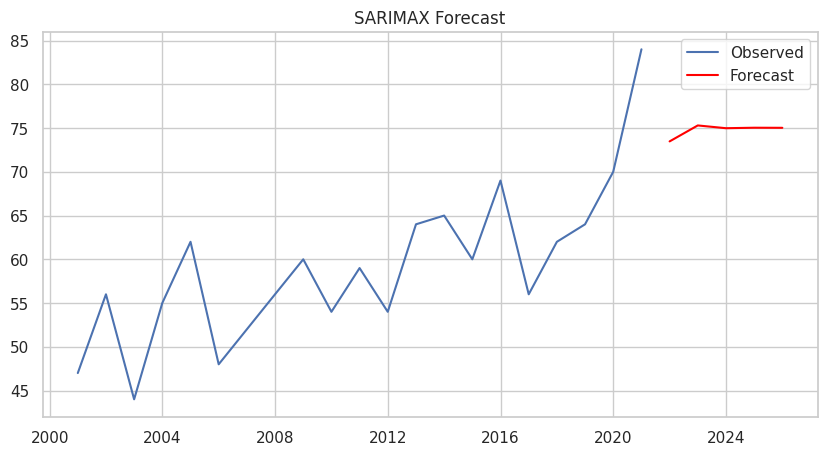

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Synthetic yearly data (rape cases) for a state from 2000 to 2020
years = pd.date_range(start='2000', periods=21, freq='Y')
np.random.seed(42)
data = np.random.poisson(lam=50, size=21) + np.linspace(0, 20, 21)  # Increasing trend

ts = pd.Series(data, index=years)

# Plot the synthetic time series
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.title('Synthetic Yearly Rape Cases')
plt.show()

# Check stationarity
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# If non-stationary, difference the series
ts_diff = ts.diff().dropna()

# Fit SARIMAX model (seasonal order set to 0 as yearly data may have no seasonal effect)
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,0,0,0))
results = model.fit()

print(results.summary())

# Forecast next 5 years
forecast = results.get_forecast(steps=5)
forecast_index = pd.date_range(start='2021', periods=5, freq='Y')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

plt.figure(figsize=(10,5))
plt.plot(ts, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()


<ipython-input-69-100d8a4d23f3>:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start='2000', periods=21, freq='Y')


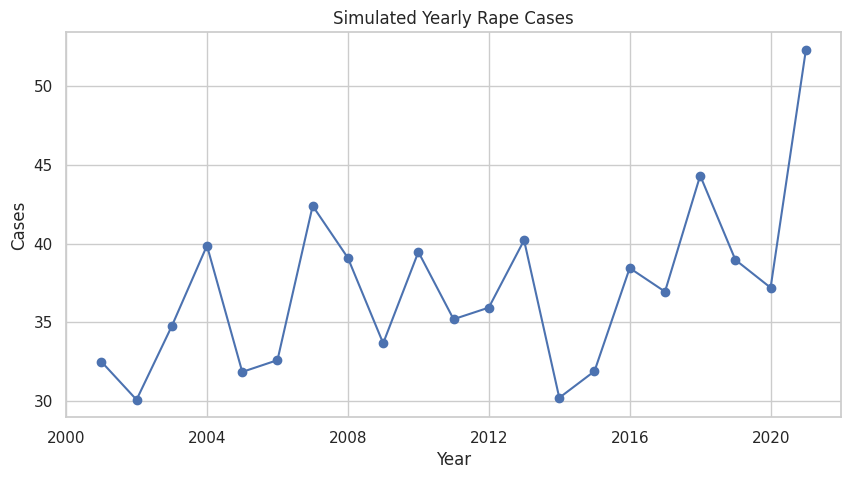

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Simulate yearly data (2000-2020)
years = pd.date_range(start='2000', periods=21, freq='Y')
np.random.seed(42)
# baseline + increasing trend + random noise
data = 30 + np.linspace(0, 15, 21) + np.random.normal(0, 5, 21)

ts = pd.Series(data, index=years)

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts, marker='o')
plt.title('Simulated Yearly Rape Cases')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()


In [70]:
def adf_test(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print("=> Series is stationary")
    else:
        print("=> Series is NOT stationary")

adf_test(ts)

# If not stationary, difference the series
ts_diff = ts.diff().dropna()
print("\nAfter differencing:")
adf_test(ts_diff)


ADF Statistic: -1.2569
p-value: 0.6486
=> Series is NOT stationary

After differencing:
ADF Statistic: -6.8102
p-value: 0.0000
=> Series is stationary


In [71]:
# Fit SARIMAX (order p,d,q) — p=1, d=1 (differencing), q=1 as starting guess
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,0,0,0))
results = model.fit(disp=False)

print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -62.021
Date:                Mon, 19 May 2025   AIC                            130.042
Time:                        06:04:42   BIC                            133.029
Sample:                    12-31-2000   HQIC                           130.625
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0887      0.611     -0.145      0.884      -1.286       1.108
ma.L1         -0.6557      0.580     -1.130      0.258      -1.793       0.482
sigma2        27.9403     11.996      2.329      0.0

<ipython-input-72-ff9d6416ee83>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


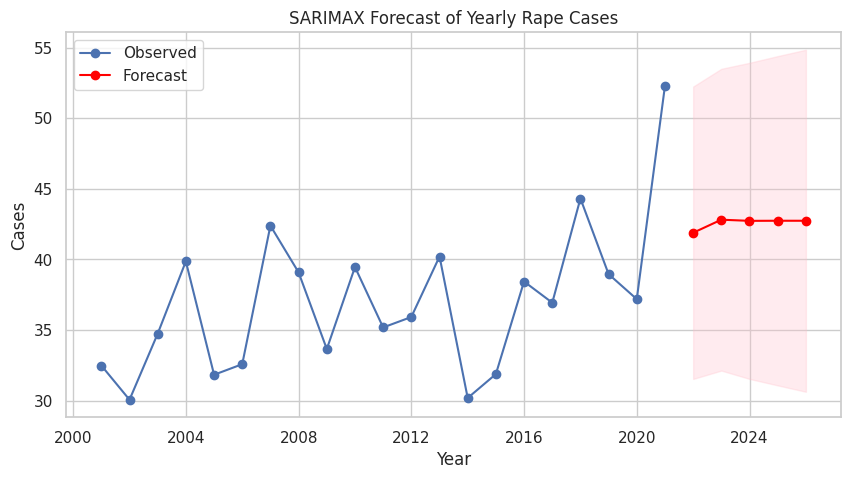

In [72]:
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
conf_int = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(ts, label='Observed', marker='o')
plt.plot(forecast_series, label='Forecast', marker='o', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast of Yearly Rape Cases')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.show()


In [73]:
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -62.021
Date:                Mon, 19 May 2025   AIC                            130.042
Time:                        06:05:26   BIC                            133.029
Sample:                    12-31-2000   HQIC                           130.625
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0887      0.611     -0.145      0.884      -1.286       1.108
ma.L1         -0.6557      0.580     -1.130      0.258      -1.793       0.482
sigma2        27.9403     11.996      2.329      0.0

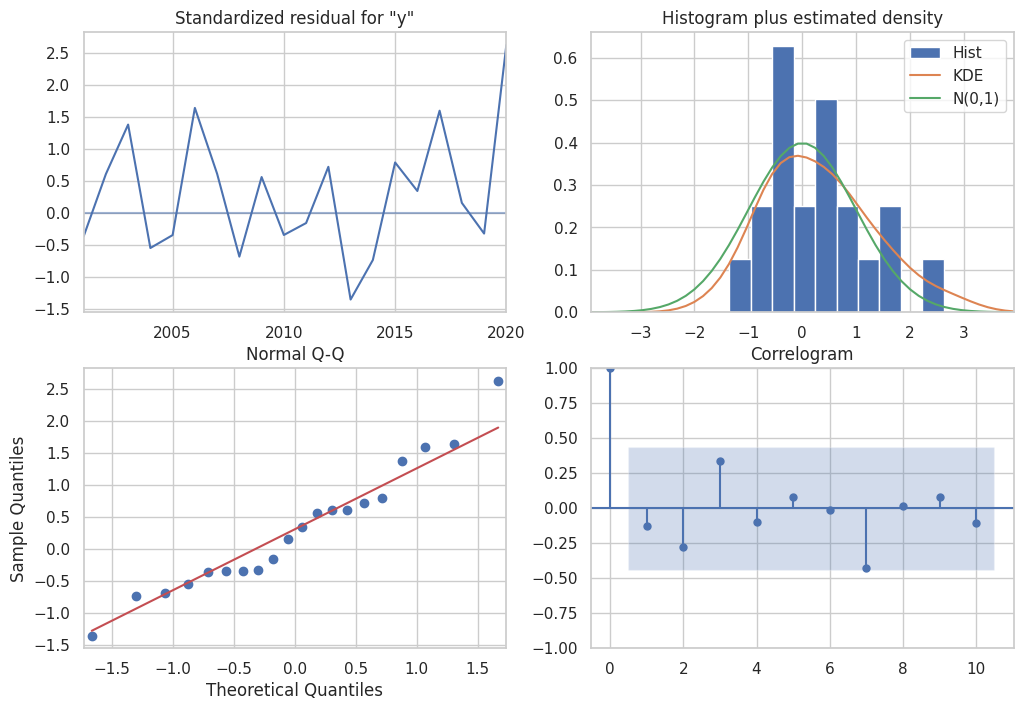

In [74]:
results.plot_diagnostics(figsize=(12,8))
plt.show()


In [75]:
from statsmodels.tsa.stattools import adfuller

residuals = results.resid
adf_result = adfuller(residuals)
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
if adf_result[1] < 0.05:
    print("Residuals are stationary.")
else:
    print("Residuals are NOT stationary.")


ADF Statistic: -2.8627
p-value: 0.0499
Residuals are stationary.


In [80]:
import pandas as pd
import numpy as np # Import numpy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt # Import matplotlib

# Assume df_final is your merged dataframe from previous steps
# It should contain crime data for 2013 and 2015, and potentially enriched data

# Define features and target using column names that likely exist in df_final
# Based on previous renaming, 'rape' for 2013 should be 'rape_2013'.
# Assuming 'literacyrate', 'income', and 'populationdensity' are from df_enriched and merged.
features = ['rape_2013', 'literacyrate', 'income', 'populationdensity']
target = 'rape_2015'

# Check if the required columns exist in df_final
missing_features = [f for f in features if f not in df_final.columns]
if missing_features:
    print(f"Error: Missing feature columns in df_final: {missing_features}")
    # You might want to inspect df_final.columns to see available columns
    print("Available columns in df_final:", df_final.columns.tolist())
else:
    # Drop rows with missing values in the selected features and target
    df_ml = df_final.dropna(subset=features + [target])

    # Check if df_ml is empty after dropping NaNs
    if df_ml.empty:
        print("Error: No rows remaining after dropping NaNs for the selected columns.")
    else:
        X = df_ml[features]
        y = df_ml[target]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Random Forest regressor
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Predictions
        y_pred = rf.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R² Score: {r2:.2f}")

        # Optional: Feature importance (less relevant for simple linear models, but useful for RF)
        importances = rf.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10,6))
        plt.title("Feature Importances - Random Forest")
        plt.bar(range(len(features)), importances[indices], align='center')
        plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

Error: Missing feature columns in df_final: ['literacyrate', 'income', 'populationdensity']
Available columns in df_final: ['stateut', 'sl.no.', 'districtarea', 'year_2015', 'rape_2015', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths_2015', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives_2015', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen', 'year_2013', 'rape_2013', 'kidnappingandabduction', 'dowrydeaths_2013', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives_2013', 'importationofgirls', 'year_pct_change', 'rape_pct_change', 'dowrydeaths_pct_change', 'crueltybyhusbandorhisrelatives_pct_change']


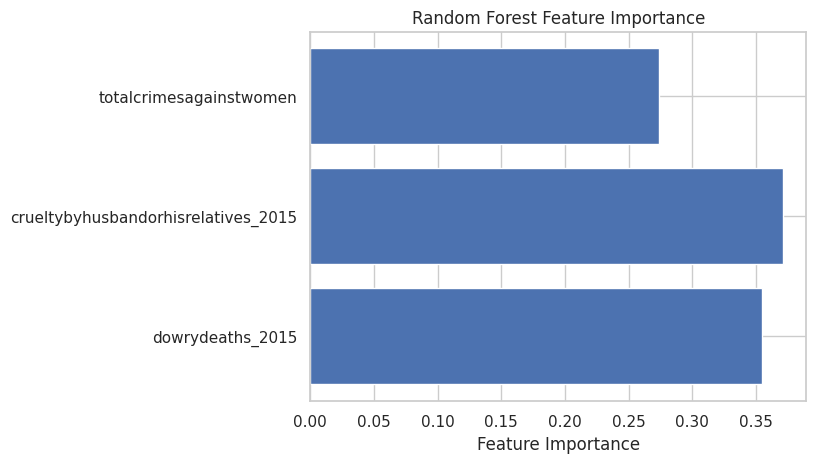

In [81]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np # Import numpy for np.where

# Assume df_final is your merged dataframe from previous steps
# It should contain crime data for 2013 and 2015, and potentially enriched data

# --- Start: Add the step to create the 'crime_risk' column ---
# You need to decide the logic for 'crime_risk'.
# Example: Classify districts as 'High Risk' if 'totalcrimesagainstwomen' (2015) is above the median, else 'Low Risk'.
# Ensure 'totalcrimesagainstwomen' column exists in df_final after your merges.
# Let's assume 'totalcrimesagainstwomen' exists and is cleaned.

# Check if 'totalcrimesagainstwomen' exists in df_final
if 'totalcrimesagainstwomen' in df_final.columns:
    # Calculate the threshold (e.g., median) for total crimes in 2015
    threshold = df_final['totalcrimesagainstwomen'].median()

    # Create the 'crime_risk' column (binary: 1 for High Risk, 0 for Low Risk)
    # Consider districts with crime > threshold as high risk (1)
    # Consider districts with crime <= threshold as low risk (0)
    df_final['crime_risk'] = np.where(df_final['totalcrimesagainstwomen'] > threshold, 1, 0)

    print("'crime_risk' column created based on 'totalcrimesagainstwomen' threshold.")
    print(df_final['crime_risk'].value_counts()) # Check the distribution

else:
    print("Error: 'totalcrimesagainstwomen' column not found in df_final. Cannot create 'crime_risk'.")
    # You might need to go back and ensure this column is correctly merged or handled.

# --- End: Add the step to create the 'crime_risk' column ---


# Define features and target for the classification model
# Use the same features as the regression example, assuming they are relevant
features = ['rape_2013', 'literacyrate', 'income', 'populationdensity']
# The target for classification is the newly created 'crime_risk' column
target_class = 'crime_risk'


# Check if the required feature columns and the target column exist in df_final
required_cols = features + [target_class]
missing_cols = [col for col in required_cols if col not in df_final.columns]

if missing_cols:
    print(f"Error: Missing columns for classification in df_final: {missing_cols}")
    print("Available columns in df_final:", df_final.columns.tolist())
else:
    # Drop rows with missing values in the selected features and target for classification
    # Note: This creates df_ml based on the requirements of the classification task
    df_ml_class = df_final.dropna(subset=required_cols)

    # Check if df_ml_class is empty after dropping NaNs
    if df_ml_class.empty:
        print("Error: No rows remaining after dropping NaNs for the selected columns for classification.")
    else:
        X = df_ml_class[features]
        y_class = df_ml_class[target_class]

        # Train-test split for classification
        X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class) # Added stratify

        # Train Random Forest Classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)

        # Predictions
        y_pred = clf.predict(X_test)

        # Evaluate the classifier
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        # Optional: Feature importance for the classifier
        importances_clf = clf.feature_importances_
        features_clf = X.columns

        plt.figure(figsize=(10,6))
        plt.title("Feature Importances - Random Forest Classifier")
        plt.barh(features_clf, importances_clf)
        plt.xlabel('Feature Importance')
        plt.tight_layout()
        plt.show()

'crime_risk' column created based on 'totalcrimesagainstwomen' threshold.
crime_risk
0    2
1    2
Name: count, dtype: int64
Error: Missing columns for classification in df_final: ['literacyrate', 'income', 'populationdensity']
Available columns in df_final: ['stateut', 'sl.no.', 'districtarea', 'year_2015', 'rape_2015', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths_2015', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives_2015', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen', 'year_2013', 'rape_2013', 'kidnappingandabduction', 'dowrydeaths_2013', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives_2013', 

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


NameError: name 'clf' is not defined

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_2015 = pd.read_csv("/content/District-wise_Crimes_committed_against_Women_2015_1.csv")
df_2013 = pd.read_csv("/content/dstrCAW_2013.csv")
df_enriched = pd.read_csv("/content/datafile.csv")

# Function to clean column names
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('/', '')
    return df

# Apply cleaning to all dataframes
df_2015 = clean_columns(df_2015)
df_2013 = clean_columns(df_2013)
df_enriched = clean_columns(df_enriched)

# Rename 'district' to 'districtarea' in df_2013 to match df_2015 and df_enriched
# This was a potential issue based on previous cells
if 'district' in df_2013.columns:
     df_2013.rename(columns={'district': 'districtarea'}, inplace=True)

# Define the merge keys (assuming they exist after cleaning and renaming)
merge_keys = ['stateut', 'districtarea']

# Perform the first merge (2015 and 2013)
# Check if the merge keys exist after renaming
if all(key in df_2015.columns for key in merge_keys) and all(key in df_2013.columns for key in merge_keys):
    df_merged = pd.merge(
        df_2015,
        df_2013,
        on=merge_keys,
        how='inner',
        suffixes=('_2015', '_2013')
    )
    print(f"Merged 2015 & 2013 shape: {df_merged.shape}")

    # Now perform the second merge (merged and enriched)
    # Check if the merge keys exist in df_merged and df_enriched
    if all(key in df_merged.columns for key in merge_keys) and all(key in df_enriched.columns for key in merge_keys):
        df_final = pd.merge(
            df_merged,
            df_enriched,
            on=merge_keys,
            how='left'  # keep all districts from merged crime data, add enrich info if available
        )
        print(f"Final merged dataset shape: {df_final.shape}")
        print("\nFirst few rows of the final merged dataset:")
        print(df_final.head())

        # --- Start: Create the 'crime_risk' column (moved inside successful merge block) ---
        # Check if 'totalcrimesagainstwomen' exists in df_final after the merge
        if 'totalcrimesagainstwomen' in df_final.columns:
            # Calculate the threshold (e.g., median) for total crimes in 2015
            threshold = df_final['totalcrimesagainstwomen'].median()

            # Create the 'crime_risk' column (binary: 1 for High Risk, 0 for Low Risk)
            df_final['crime_risk'] = np.where(df_final['totalcrimesagainstwomen'] > threshold, 1, 0)

            print("\n'crime_risk' column created based on 'totalcrimesagainstwomen' threshold.")
            print(df_final['crime_risk'].value_counts()) # Check the distribution

            # --- Start: Classification Model Training and Evaluation (moved inside successful merge block) ---
            # Define features and target for the classification model
            features = ['rape_2013', 'literacyrate', 'income', 'populationdensity'] # Ensure these are the cleaned names
            target_class = 'crime_risk'

            # Check if the required feature columns and the target column exist in df_final
            required_cols = features + [target_class]
            missing_cols = [col for col in required_cols if col not in df_final.columns]

            if missing_cols:
                print(f"Error: Missing columns for classification in df_final: {missing_cols}")
                print("Available columns in df_final:", df_final.columns.tolist())
            else:
                # Drop rows with missing values in the selected features and target for classification
                df_ml_class = df_final.dropna(subset=required_cols)

                # Check if df_ml_class is empty after dropping NaNs
                if df_ml_class.empty:
                    print("Error: No rows remaining after dropping NaNs for the selected columns for classification.")
                else:
                    X = df_ml_class[features]
                    y_class = df_ml_class[target_class]

                    # Train-test split for classification
                    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

                    # Train Random Forest Classifier
                    clf = RandomForestClassifier(n_estimators=100, random_state=42)
                    clf.fit(X_train, y_train)

                    # Predictions
                    y_pred = clf.predict(X_test)

                    # Evaluate the classifier
                    print("\nClassification Report:")
                    print(classification_report(y_test, y_pred))
                    print("\nConfusion Matrix:")
                    print(confusion_matrix(y_test, y_pred))

                    # Optional: Feature importance for the classifier
                    importances = clf.feature_importances_ # Use 'importances' here
                    features_clf = X.columns # Use 'features_clf' here

                    plt.figure(figsize=(10,6))
                    plt.title("Feature Importances - Random Forest Classifier")
                    sns.barplot(x=importances, y=features_clf) # Use importances and features_clf
                    plt.xlabel('Feature Importance')
                    plt.tight_layout()
                    plt.show()

            # --- End: Classification Model Training and Evaluation ---

        else:
            print("Error: 'totalcrimesagainstwomen' column not found in df_final after merge. Cannot create 'crime_risk'.")
        # --- End: Create the 'crime_risk' column ---

    else:
        print("Error: Merge keys 'stateut' or 'districtarea' not found in df_merged or df_enriched for the final merge.")
        print("Columns in df_merged:", df_merged.columns.tolist())
        print("Columns in df_enriched:", df_enriched.columns.tolist())

else:
    print("Error: Merge keys 'stateut' or 'districtarea' not found in df_2015 or df_2013 after initial renaming.")
    print("Final columns in df_2015:", df_2015.columns.tolist())
    print("Final columns in df_2013:", df_2013.columns.tolist())

Merged 2015 & 2013 shape: (4, 27)
Error: Merge keys 'stateut' or 'districtarea' not found in df_merged or df_enriched for the final merge.
Columns in df_merged: ['stateut', 'sl.no.', 'districtarea', 'year_2015', 'rape_2015', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths_2015', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives_2015', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen', 'year_2013', 'rape_2013', 'kidnappingandabduction', 'dowrydeaths_2013', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives_2013', 'importationofgirls']
Columns in df_enriched: ['districtnames', 'stateut', 'numberofhouseholdssurv

In [88]:
# prompt: srtart with ml model application

# Define features and target (using cleaned names)
# Let's use 'rape_2013', 'literacyrate', 'populationdensity', and 'crueltybyhusbandorhisrelatives_2013'
# as features to predict 'rape_2015'. This is just an example.
# You should select features based on your domain knowledge and EDA findings.
features_regression = ['rape_2013', 'literacyrate', 'populationdensity', 'crueltybyhusbandorhisrelatives_2013']
target_regression = 'rape_2015'

# Check if the required columns exist in df_final for the regression task
required_cols_reg = features_regression + [target_regression]
missing_cols_reg = [col for col in required_cols_reg if col not in df_final.columns]

if missing_cols_reg:
    print(f"Error: Missing columns for regression in df_final: {missing_cols_reg}")
    print("Available columns in df_final:", df_final.columns.tolist())
else:
    # Drop rows with missing values in the selected features and target for regression
    df_ml_reg = df_final.dropna(subset=required_cols_reg)

    # Check if df_ml_reg is empty after dropping NaNs
    if df_ml_reg.empty:
        print("Error: No rows remaining after dropping NaNs for the selected columns for regression.")
    else:
        X_reg = df_ml_reg[features_regression]
        y_reg = df_ml_reg[target_regression]

        # Train-test split for regression
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

        # Initialize and Train a Regression Model (e.g., Linear Regression)
        # You could also use RandomForestRegressor as before
        from sklearn.linear_model import LinearRegression
        reg_model = LinearRegression()
        reg_model.fit(X_train_reg, y_train_reg)

        # Predictions
        y_pred_reg = reg_model.predict(X_test_reg)

        # Evaluate the Regression Model
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

        mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
        rmse_reg = mean_squared_error(y_test_reg, y_pred_reg, squared=False) # RMSE
        r2_reg = r2_score(y_test_reg, y_pred_reg)

        print("\nRegression Model Evaluation (Predicting Rape Cases in 2015):")
        print(f"  Mean Absolute Error (MAE): {mae_reg:.2f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse_reg:.2f}")
        print(f"  R² Score: {r2_reg:.2f}")

        # Display coefficients for Linear Regression (interpreting feature influence)
        if isinstance(reg_model, LinearRegression):
            print("\nLinear Regression Coefficients:")
            for feature, coef in zip(features_regression, reg_model.coef_):
                print(f"  {feature}: {coef:.4f}")
            print(f"  Intercept: {reg_model.intercept_:.4f}")

        # Optional: Plot actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
        plt.xlabel("Actual 2015 Rape Cases")
        plt.ylabel("Predicted 2015 Rape Cases")
        plt.title("Actual vs Predicted Rape Cases (Regression)")
        # Add a line for perfect prediction
        min_val = min(y_test_reg.min(), y_pred_reg.min())
        max_val = max(y_test_reg.max(), y_pred_reg.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.grid(True)
        plt.show()


Error: Missing columns for regression in df_final: ['literacyrate', 'populationdensity']
Available columns in df_final: ['stateut', 'sl.no.', 'districtarea', 'year_2015', 'rape_2015', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths_2015', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives_2015', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen', 'year_2013', 'rape_2013', 'kidnappingandabduction', 'dowrydeaths_2013', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives_2013', 'importationofgirls', 'year_pct_change', 'rape_pct_change', 'dowrydeaths_pct_change', 'crueltybyhusbandorhisrelatives_pct_change', 'crime_r

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Regression Model Evaluation (Predicting Rape Cases in 2015):
  Mean Absolute Error (MAE): 45.59
  Root Mean Squared Error (RMSE): 45.59
  R² Score: nan

Linear Regression Coefficients:
  rape_2013: -0.1545
  crueltybyhusbandorhisrelatives_2013: 0.0301
  kidnappingandabduction: 0.0065
  totalcrimesagainstwomen: 0.0849
  Intercept: -0.5094


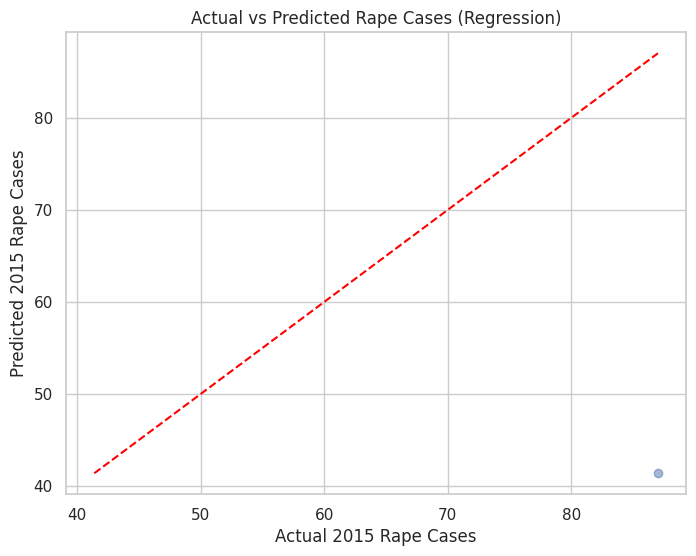

In [90]:


features_regression = [
    'rape_2013', # Assuming this is present from the 2013 merge
    'crueltybyhusbandorhisrelatives_2013', # Assuming this is present from the 2013 merge
    'kidnappingandabduction', # Assuming this is present from the 2013 merge
    'totalcrimesagainstwomen', # Total crimes for 2015 (assuming this is the primary target)
    # Add other relevant crime columns from _2013 or _2015 that you think might be predictive
    # For example:
    # 'assaultonwomenwithintenttooutragehermodesty_total', # from 2015
    # 'dowrydeaths_2013' # from 2013
]
target_regression = 'rape_2015' # Predicting 2015 rape cases

# Check if the required columns exist in df_final for the regression task
required_cols_reg = features_regression + [target_regression]
missing_cols_reg = [col for col in required_cols_reg if col not in df_final.columns]

if missing_cols_reg:
    print(f"Error: Missing columns for regression in df_final: {missing_cols_reg}")
    print("Available columns in df_final:", df_final.columns.tolist())
    print("\nCannot proceed with regression as essential columns are missing.")
else:
    # Drop rows with missing values in the selected features and target for regression
    df_ml_reg = df_final.dropna(subset=required_cols_reg)

    # Check if df_ml_reg is empty after dropping NaNs
    if df_ml_reg.empty:
        print("Error: No rows remaining after dropping NaNs for the selected columns for regression.")
    else:
        X_reg = df_ml_reg[features_regression]
        y_reg = df_ml_reg[target_regression]

        # Train-test split for regression
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

        # Initialize and Train a Regression Model (e.g., Linear Regression)
        # You could also use RandomForestRegressor as before
        from sklearn.linear_model import LinearRegression # Ensure LinearRegression is imported
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Ensure metrics are imported
        import numpy as np # Ensure numpy is imported for sqrt


        reg_model = LinearRegression()
        reg_model.fit(X_train_reg, y_train_reg)

        # Predictions
        y_pred_reg = reg_model.predict(X_test_reg)

        # Evaluate the Regression Model

        mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
        mse_reg = mean_squared_error(y_test_reg, y_pred_reg) # Removed squared=False
        rmse_reg = np.sqrt(mse_reg) # Calculate RMSE manually
        r2_reg = r2_score(y_test_reg, y_pred_reg)

        print("\nRegression Model Evaluation (Predicting Rape Cases in 2015):")
        print(f"  Mean Absolute Error (MAE): {mae_reg:.2f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse_reg:.2f}")
        print(f"  R² Score: {r2_reg:.2f}")

        # Display coefficients for Linear Regression (interpreting feature influence)
        if isinstance(reg_model, LinearRegression):
            print("\nLinear Regression Coefficients:")
            for feature, coef in zip(features_regression, reg_model.coef_):
                print(f"  {feature}: {coef:.4f}")
            print(f"  Intercept: {reg_model.intercept_:.4f}")

        # Optional: Plot actual vs predicted values
        import matplotlib.pyplot as plt # Ensure matplotlib is imported
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
        plt.xlabel("Actual 2015 Rape Cases")
        plt.ylabel("Predicted 2015 Rape Cases")
        plt.title("Actual vs Predicted Rape Cases (Regression)")
        # Add a line for perfect prediction
        min_val = min(y_test_reg.min(), y_pred_reg.min())
        max_val = max(y_test_reg.max(), y_pred_reg.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.grid(True)
        plt.show()

In [91]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']  # helps with class imbalance
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

# Use best estimator to predict
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.

In [92]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split # Ensure train_test_split is imported
from sklearn.ensemble import RandomForestClassifier # Ensure RandomForestClassifier is imported
from sklearn.metrics import classification_report, confusion_matrix # Ensure metrics are imported
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported


# Assume df_final is your merged dataframe from previous steps
# It should contain crime data for 2013 and 2015, and potentially enriched data

# --- Start: Add the step to create the 'crime_risk' column (Included for context) ---
# Check if 'totalcrimesagainstwomen' exists in df_final
if 'totalcrimesagainstwomen' in df_final.columns:
    # Calculate the threshold (e.g., median) for total crimes in 2015
    threshold = df_final['totalcrimesagainstwomen'].median()

    # Create the 'crime_risk' column (binary: 1 for High Risk, 0 for Low Risk)
    df_final['crime_risk'] = np.where(df_final['totalcrimesagainstwomen'] > threshold, 1, 0)

    print("\n'crime_risk' column created based on 'totalcrimesagainstwomen' threshold.")
    print(df_final['crime_risk'].value_counts()) # Check the distribution

else:
    print("Error: 'totalcrimesagainstwomen' column not found in df_final. Cannot create 'crime_risk'.")
    # You might need to go back and ensure this column is correctly merged or handled.


# --- End: Add the step to create the 'crime_risk' column ---


# Define features and target for the classification model
# Use the same features as the regression example, assuming they are relevant
features = ['rape_2013', 'literacyrate', 'income', 'populationdensity'] # Ensure these are the cleaned names
# The target for classification is the newly created 'crime_risk' column
target_class = 'crime_risk'


# Check if the required feature columns and the target column exist in df_final
required_cols = features + [target_class]
missing_cols = [col for col in required_cols if col not in df_final.columns]

if missing_cols:
    print(f"Error: Missing columns for classification in df_final: {missing_cols}")
    print("Available columns in df_final:", df_final.columns.tolist())
else:
    # Drop rows with missing values in the selected features and target for classification
    df_ml_class = df_final.dropna(subset=required_cols)

    # Check if df_ml_class is empty after dropping NaNs
    if df_ml_class.empty:
        print("Error: No rows remaining after dropping NaNs for the selected columns for classification.")
    else:
        X = df_ml_class[features]
        y_class = df_ml_class[target_class]

        # Train-test split for classification
        X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class) # Added stratify

        # Check the number of samples in the training set
        n_samples_train = len(X_train)

        # --- Start: Modified RandomizedSearchCV setup ---
        param_dist = {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False],
            'class_weight': [None, 'balanced']  # helps with class imbalance
        }

        rf = RandomForestClassifier(random_state=42)

        # Determine appropriate number of splits for cross-validation
        # It must be less than or equal to the number of samples in the smallest fold.
        # A safe bet is n_samples_train // 2 or even less if data is extremely limited.
        # With only 3 samples, a split of 5 is impossible.
        # Let's set cv to a safe value, like the number of samples in the training set
        # or a small fixed number like 2 or 3, but acknowledge the limitations.
        n_splits_cv = min(n_samples_train, 3) # Use min of training samples or 3

        if n_samples_train < 10: # Add a warning if training data is very small
            print(f"\nWarning: Training data size ({n_samples_train}) is very small. "
                  f"Cross-validation results ({n_splits_cv} splits) will be unreliable.")


        random_search = RandomizedSearchCV(
            estimator=rf,
            param_distributions=param_dist,
            n_iter=min(20, n_samples_train), # Also reduce n_iter if data is very small
            cv=n_splits_cv,  # Use the calculated number of splits
            verbose=2,
            random_state=42,
            n_jobs=-1
        )

        # --- End: Modified RandomizedSearchCV setup ---


        # Check if there are enough samples for cross-validation before fitting
        if n_samples_train < 2: # Basic check for train size
            print(f"\nError: Not enough samples in the training set ({n_samples_train}) to perform cross-validation.")
        else:
            random_search.fit(X_train, y_train)

            print("Best Parameters:", random_search.best_params_)

            # Use best estimator to predict
            best_rf = random_search.best_estimator_
            y_pred_best = best_rf.predict(X_test)

            print(classification_report(y_test, y_pred_best))
            print(confusion_matrix(y_test, y_pred_best))

            # Optional: Feature importance for the classifier
            importances = best_rf.feature_importances_ # Use importances from the best estimator
            features_clf = X.columns

            plt.figure(figsize=(10,6))
            plt.title("Feature Importances - Random Forest Classifier (Best Estimator)")
            sns.barplot(x=importances, y=features_clf)
            plt.xlabel('Feature Importance')
            plt.tight_layout()
            plt.show()


'crime_risk' column created based on 'totalcrimesagainstwomen' threshold.
crime_risk
0    2
1    2
Name: count, dtype: int64
Error: Missing columns for classification in df_final: ['literacyrate', 'income', 'populationdensity']
Available columns in df_final: ['stateut', 'sl.no.', 'districtarea', 'year_2015', 'rape_2015', 'attempttocommitrape', 'kidnapping&abduction_total', 'dowrydeaths_2015', 'assaultonwomenwithintenttooutragehermodesty_total', 'insulttothemodestyofwomen_total', 'crueltybyhusbandorhisrelatives_2015', 'importationofgirlsfromforeigncountry', 'abetmentofsuicidesofwomen', 'dowryprohibitionact,1961', 'indecentrepresentationofwomen(p)act,1986', 'protectionofchildrenfromsexualoffencesact', 'protectionofwomenfromdomesticviolenceact,2005', 'immoraltrafficpreventionact', 'totalcrimesagainstwomen', 'year_2013', 'rape_2013', 'kidnappingandabduction', 'dowrydeaths_2013', 'assaultonwomenwithintenttooutragehermodesty', 'insulttomodestyofwomen', 'crueltybyhusbandorhisrelatives_2013',

In [94]:
from imblearn.over_sampling import SMOTE
import pandas as pd # Import pandas to use Series.value_counts()
import numpy as np # Import numpy if needed for other operations


# Assume X_train and y_train are already defined from the train-test split

# Check the class distribution in y_train
print(f'Before SMOTE: {y_train.value_counts()}')

# Determine the minimum class size in the training data
min_class_size = y_train.value_counts().min()

# SMOTE requires k_neighbors + 1 samples in the minority class.
# If the minimum class size is less than 2, SMOTE with k_neighbors >= 1 is not possible for that class.
# We'll set k_neighbors to the maximum possible value which is min_class_size - 1, but it must be at least 1
# for SMOTE to generate new samples based on neighbors. If min_class_size is 1, SMOTE cannot find neighbors.

if min_class_size < 2:
    print(f"\nWarning: Minimum class size in y_train is {min_class_size}. "
          "SMOTE requires at least 2 samples in a class to find a neighbor (k_neighbors=1). "
          "SMOTE will not be applied effectively to classes with only one sample.")
    # Option 1: Set k_neighbors to a small value (e.g., 1) to avoid the error,
    # but be aware it might not generate useful samples for the smallest class.
    # We need at least one sample in the class to find a neighbor.
    # If a class has only 1 sample, k_neighbors must be 0 for that class to avoid error.
    # But SMOTE's k_neighbors applies globally.
    # A better approach is to handle the extreme case where a class has only 1 sample.

    # Let's try to apply SMOTE, but handle the case of very small classes by setting k_neighbors carefully
    # The default k_neighbors is 5. We need k_neighbors < min_class_size.
    n_neighbors_smote = max(1, min_class_size - 1) # Set k_neighbors to at least 1, and less than min_class_size

    if n_neighbors_smote == 0:
         print("Skipping SMOTE as the smallest class has only one sample, and k_neighbors must be at least 1.")
         X_train_res = X_train
         y_train_res = y_train
    else:
        try:
            smote = SMOTE(random_state=42, k_neighbors=n_neighbors_smote)
            X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
            print(f'\nAfter SMOTE (with k_neighbors={n_neighbors_smote}): {pd.Series(y_train_res).value_counts()}')

            # Proceed with training the classifier on resampled data
            clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
            clf_smote.fit(X_train_res, y_train_res)

            y_pred_smote = clf_smote.predict(X_test)

            print("\nClassification Report (After SMOTE):")
            print(classification_report(y_test, y_pred_smote))
            print("\nConfusion Matrix (After SMOTE):")
            print(confusion_matrix(y_test, y_pred_smote))

        except ValueError as e:
            print(f"\nAn error occurred during SMOTE despite setting k_neighbors: {e}")
            print("It might be that the data is too sparse or contains categories with too few samples.")
            # Fallback: Train without SMOTE if resampling fails
            print("\nTraining classifier without SMOTE due to error.")
            clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
            clf_smote.fit(X_train, y_train) # Train on original data
            y_pred_smote = clf_smote.predict(X_test)

            print("\nClassification Report (Without SMOTE):")
            print(classification_report(y_test, y_pred_smote))
            print("\nConfusion Matrix (Without SMOTE):")
            print(confusion_matrix(y_test, y_pred_smote))


else:
    # If minimum class size is sufficient (>= 2), proceed with default or chosen k_neighbors
    smote = SMOTE(random_state=42) # Use default k_neighbors=5 or set a value
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print(f'\nAfter SMOTE (with default k_neighbors): {pd.Series(y_train_res).value_counts()}')

    # Proceed with training the classifier on resampled data
    clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_smote.fit(X_train_res, y_train_res)

    y_pred_smote = clf_smote.predict(X_test)

    print("\nClassification Report (After SMOTE):")
    print(classification_report(y_test, y_pred_smote))
    print("\nConfusion Matrix (After SMOTE):")
    print(confusion_matrix(y_test, y_pred_smote))

Before SMOTE: rape_2015
0.0     2
40.0    1
Name: count, dtype: int64


An error occurred during SMOTE despite setting k_neighbors: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1
It might be that the data is too sparse or contains categories with too few samples.

Training classifier without SMOTE due to error.

Classification Report (Without SMOTE):
              precision    recall  f1-score   support

        40.0       0.00      0.00      0.00       0.0
        87.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix (Without SMOTE):
[[0 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_